## IMPORTS

In [7]:
%matplotlib inline
import os
import sys
N_up = 1
nb_dir = '/'.join(os.getcwd().split('/')[:-N_up])
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np


import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.optim import Optimizer


import collections
import h5py, sys
import gzip
import os
import math

import time
import torch.utils.data
from torchvision import transforms, datasets
import scipy.ndimage as ndim

try:
    import cPickle as pickle
except:
    import pickle

In [3]:
from src.plots import errorfill

savedir = '../saves/paper_plots/'
datadir = savedir + 'data/'

## DEFINE ICLR parameters

In [4]:

text_width = 5.50107 # in  --> Confirmed with template explanation
# column_width = 3.25063 # in --> Confirmed with template explanation


import matplotlib
# matplotlib.use('pgf')
import matplotlib.pyplot as plt
import seaborn as sns

fs_m1 = 6
fs = 10
fs_p1 = 10

matplotlib.rc('font', serif='Times')
    
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title

matplotlib.rc('font',**{'family':'serif','serif':['Palatino']})
matplotlib.rc('text', usetex=True)


# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'



base_c10 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

base_c11k = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#000000']





# Guide says ommit titles in figures
## Also says that lines must be at least 0.5 pts thick


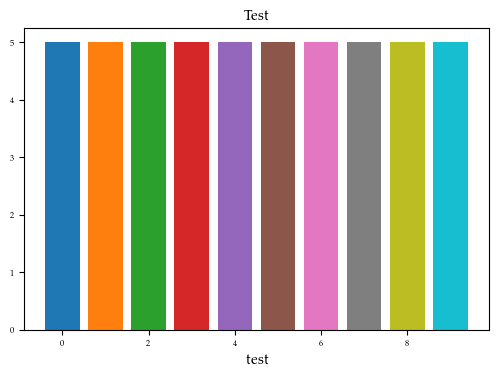

In [9]:
i = range(len(base_c10))
a = [5]*len(base_c10)

# plt.figure(dpi=80)
# plt.bar(i,a, color=base_c10)-Copy1-Copy1
# plt.title('$Test$', fontsize=fs_m1)
# plt.xlabel('Test', fontsize=fs)



plt.figure(dpi=100)
plt.bar(i,a, color=base_c10)
plt.title('Test')
plt.xlabel('test')
plt.show()

# LOAD all data from experiments

# Logistic Plot

In [6]:
# logistic_moons_tup = np.load('./saves/paper_plots/data/logistic_moons_tup.npy', allow_pickle=True)

# [X_train, y_train, extent1, prob_mtx_pred, extent2, predictive_H, aleatoric_H, epistemic_H] = logistic_moons_tup






FileNotFoundError: [Errno 2] No such file or directory: './saves/paper_plots/data/logistic_moons_tup.npy'

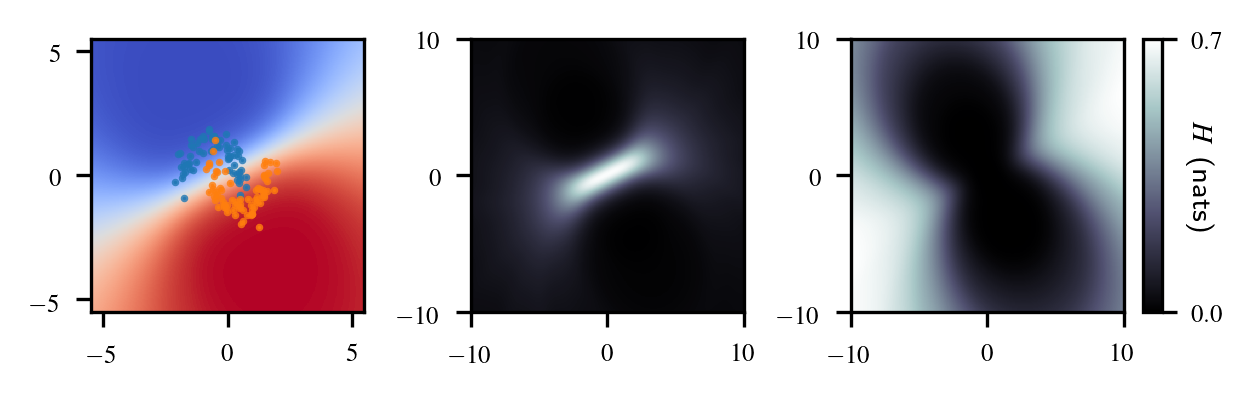

In [7]:


# max_H = -np.log(0.5)

# fig, ax = plt.subplots(nrows=1, ncols=4, dpi=300, figsize=(text_width*0.9, 10))
# # plt.figure(dpi=140)
# ax[0].imshow(prob_mtx_pred, extent=(-extent1, extent1, -extent1, extent1), cmap='coolwarm', origin='lower')
# # ax[0].set_title('Variational Bayes')
# ax[0].set_xticks([-5, 0, 5])
# ax[0].set_yticks([-5, 0, 5])
# for i in range(2):
#     idxs = (y_train == i)
#     ax[0].plot(X_train[idxs,0], X_train[idxs,1], '.', c=base_c10[i], alpha=0.8, markersize=1.6)
    
    
# imm = ax[1].imshow(aleatoric_H, extent=(-extent2, extent2, -extent2, extent2), cmap='bone', origin='lower', vmin=0, vmax=0.7)
# ax[1].set_xticks([-10, 0, 10])
# ax[1].set_yticks([-10, 0, 10])
# # ax[1].set_title('aleatoric entropy') 
# ax[2].imshow(epistemic_H, extent=(-extent2, extent2, -extent2, extent2), cmap='bone', origin='lower')
# ax[2].set_xticks([-10, 0, 10])
# ax[2].set_yticks([-10, 0, 10])
# # ax[2].set_title('epistemic entropy') 

# # plt.tight_layout()

# from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
# ip = InsetPosition(ax[2], [1.07,0,0.07,1]) 
# ax[3].set_axes_locator(ip)
# cbar = fig.colorbar(imm, cax=ax[3], ax=[ax[1],ax[2]])

# cbar.set_label('$H$ (nats)', rotation=270, labelpad=-2, fontsize=7)

# from matplotlib.ticker import FormatStrFormatter

# cbar.set_ticks([0, round(max_H,1)])
# # cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.39, hspace=0)

# # plt.savefig(savedir + 'logistic_uncertainty.pdf', format='pdf', bbox_inches='tight')
# #

### HMC moons

In [13]:
# logistic_moons_tup = np.load('./saves/paper_plots/data/SGHMC_moons_tup.npy', allow_pickle=True)

# [X_train, y_train, extent1, prob_mtx_pred, extent2, predictive_H, aleatoric_H, epistemic_H] = logistic_moons_tup






#### Note

Lack of class overlap significantly reduces noise uncertainty

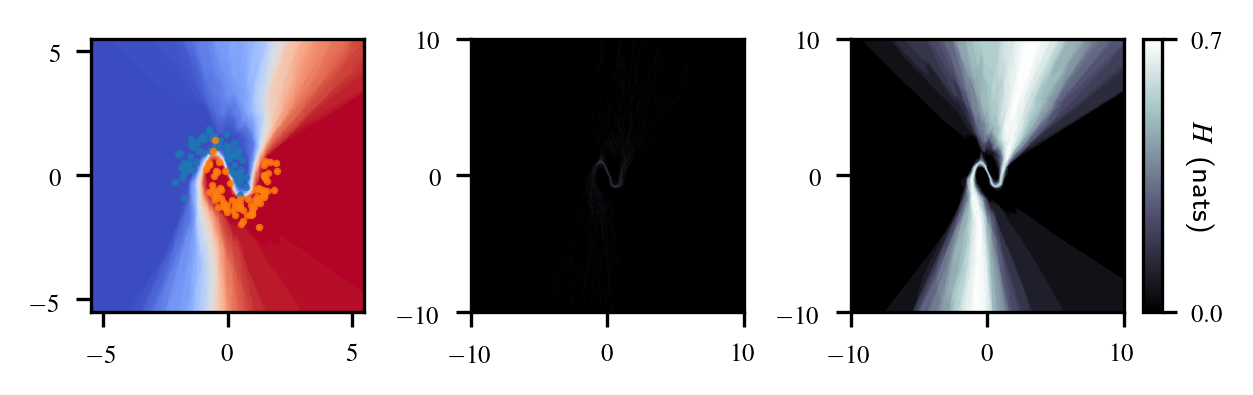

In [16]:


# max_H = -np.log(0.5)

# fig, ax = plt.subplots(nrows=1, ncols=4, dpi=300, figsize=(text_width*0.9, 10))
# # plt.figure(dpi=140)
# ax[0].imshow(prob_mtx_pred, extent=(-extent1, extent1, -extent1, extent1), cmap='coolwarm', origin='lower')
# # ax[0].set_title('Variational Bayes')
# ax[0].set_xticks([-5, 0, 5])
# ax[0].set_yticks([-5, 0, 5])
# for i in range(2):
#     idxs = (y_train == i)
#     ax[0].plot(X_train[idxs,0], X_train[idxs,1], '.', c=base_c10[i], alpha=0.8, markersize=1.6)
    
    
# imm = ax[1].imshow(aleatoric_H, extent=(-extent2, extent2, -extent2, extent2), cmap='bone', origin='lower', vmin=0, vmax=0.7)
# ax[1].set_xticks([-10, 0, 10])
# ax[1].set_yticks([-10, 0, 10])
# # ax[1].set_title('aleatoric entropy') 
# ax[2].imshow(epistemic_H, extent=(-extent2, extent2, -extent2, extent2), cmap='bone', origin='lower')
# ax[2].set_xticks([-10, 0, 10])
# ax[2].set_yticks([-10, 0, 10])
# # ax[2].set_title('epistemic entropy') 

# # plt.tight_layout()

# from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
# ip = InsetPosition(ax[2], [1.07,0,0.07,1]) 
# ax[3].set_axes_locator(ip)
# cbar = fig.colorbar(imm, cax=ax[3], ax=[ax[1],ax[2]])

# cbar.set_label('$H$ (nats)', rotation=270, labelpad=-2, fontsize=7)

# from matplotlib.ticker import FormatStrFormatter

# cbar.set_ticks([0, round(max_H,1)])
# # cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.39, hspace=0)

# # plt.savefig(savedir + 'SGHMC_uncertainty.pdf', format='pdf', bbox_inches='tight')
# #

In [8]:
print(max_H)

print(epistemic_H.max(), epistemic_H.min())

print(aleatoric_H.max(), aleatoric_H.min())

0.6931471805599453
0.64297116 0.0012762547
0.6918421 0.004162585


# Lets create a first page example

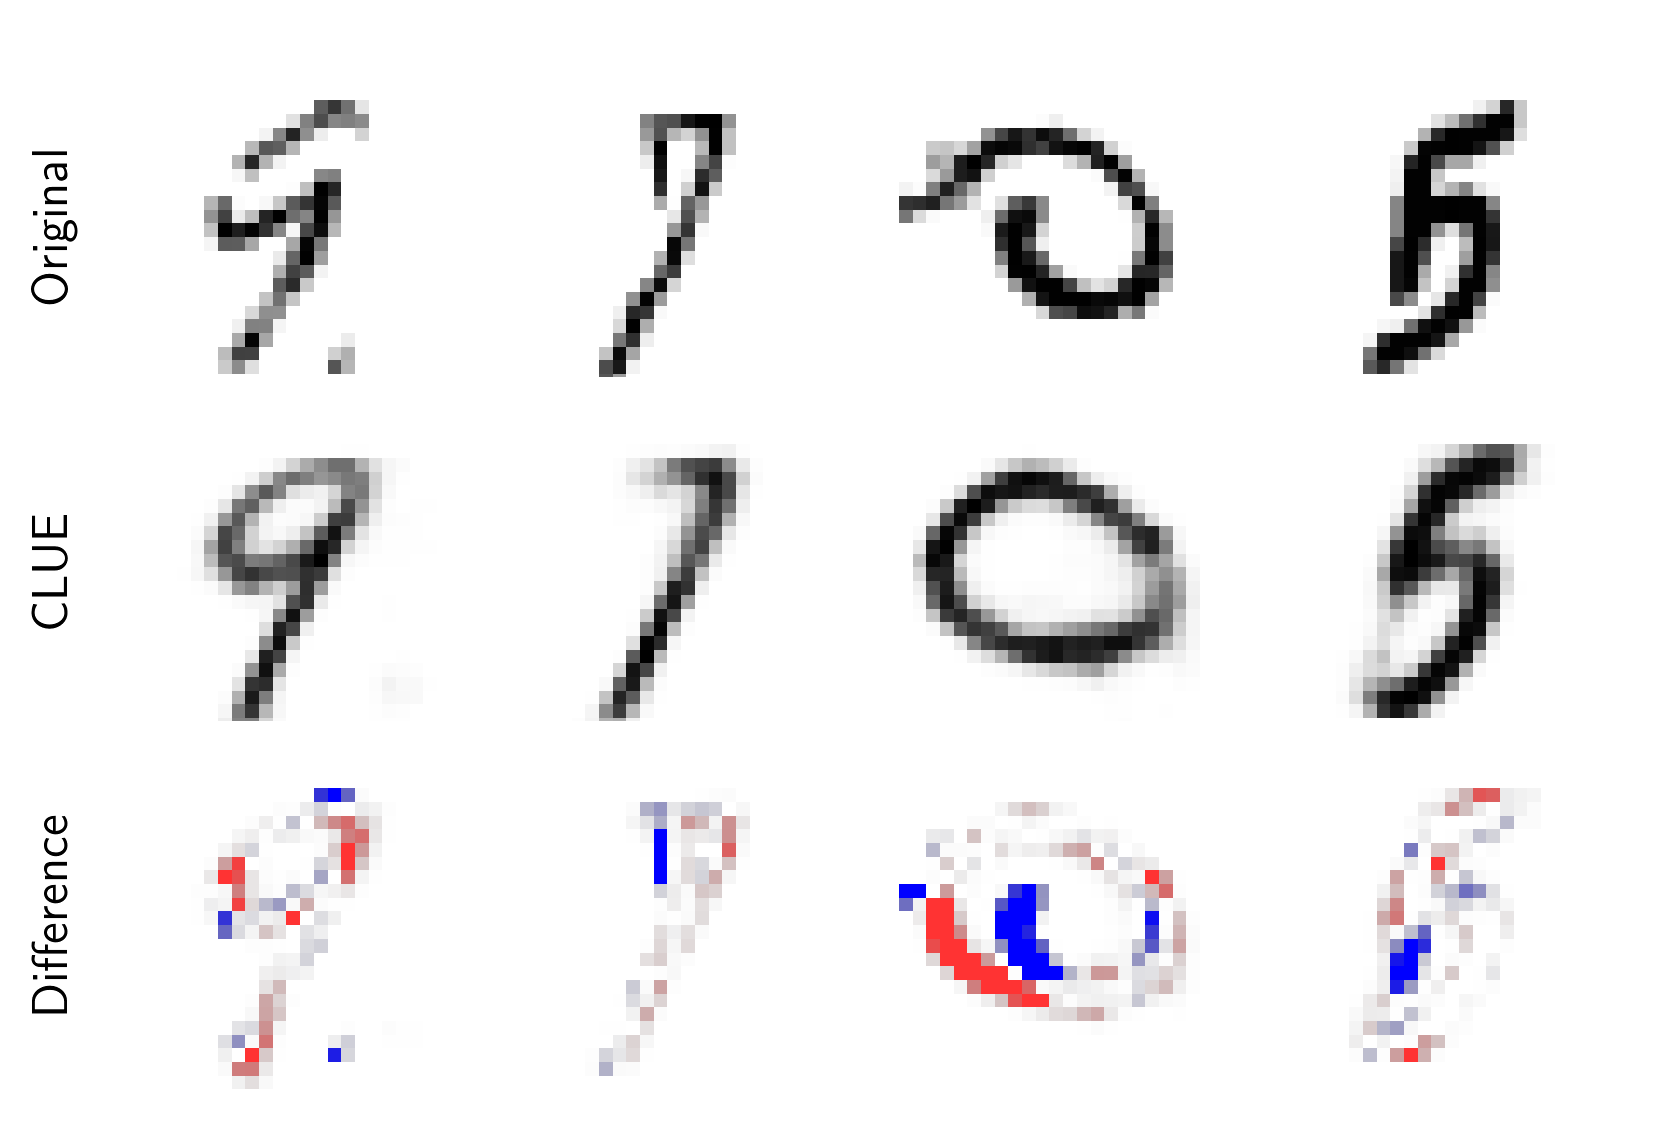

In [9]:
# def alpha_im(im, alpha):
#     a = np.repeat(np.expand_dims(im, axis=2), 4, axis=2)
#     a[:,:,3] = alpha
#     return a

# tmp_fs = 12

# fig, ax = plt.subplots(nrows=3, ncols=4, dpi=300, figsize=(text_width*1, text_width*0.70))

# [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('../plots/c4/z_real_MNIST.npy', allow_pickle=True)

# for col_ in range(4):
#     cols = [0, 2, 3, 5]
#     mask_idxs = [62, 2, 9, 5, 24, 50]
    
#     col = cols[col_]
#     row = 0
    
#     ax[row][col_].imshow(1-og_x_vec[col], cmap='gray')
#     if col_ == 0:
#         ax[row][col_].set_ylabel('Original',  fontsize=tmp_fs)

#     ## These lines turn off all axis elements except labels
#     ax[row][col_].xaxis.set_visible(False)
#     # make spines (the box) invisible
#     plt.setp(ax[row][col_].spines.values(), visible=False)
#     # remove ticks and labels for the left axis
#     ax[row][col_].tick_params(left=False, labelleft=False)


#     row = 1
#     ax[row][col_].imshow(1-ex_x_vec[col], cmap='gray')
#     if col_ == 0:
#         ax[row][col_].set_ylabel('CLUE',  fontsize=tmp_fs)
# #     ax[row][col].set_title('$H=%3.2f$' % (ex_h_vec[row]))

#     ## These lines turn off all axis elements except labels
#     ax[row][col_].xaxis.set_visible(False)
#     # make spines (the box) invisible
#     plt.setp(ax[row][col_].spines.values(), visible=False)
#     # remove ticks and labels for the left axis
#     ax[row][col_].tick_params(left=False, labelleft=False)

#     mask = ex_x_vec[col] - og_x_vec[col] # ex_mask_vec[0][mask_idxs[col],0,:,:]
    
    
#     mask_neg = -mask
#     mask_neg[mask_neg < 1e-2] = 0
#     mask_neg = (mask_neg**2)
#     mask_neg = np.repeat(np.expand_dims(mask_neg, axis=2), 4, axis=2)*2
#     mask_neg[:,:,0:2] = 0

#     mask_pos = mask
#     mask_pos[mask_pos < 1e-2] = 0
#     mask_pos = mask_pos**1.6
#     mask_pos = np.repeat(np.expand_dims(mask_pos, axis=2), 4, axis=2)*2
#     mask_pos[:,:,1:3] = 0


#     row = 2
# #     ax[row][col_].imshow(1-og_x_vec[col_], cmap='gray')
#     ax[row][col_].imshow(mask_pos*1.2, alpha=0.8)#,  vmin=0, vmax=1)
#     ax[row][col_].imshow(mask_neg, alpha=1)
#     if col_ == 0:
#         ax[row][col_].set_ylabel('Difference',  fontsize=tmp_fs)
#     ## These lines turn off all axis elements except labels
#     ax[row][col_].xaxis.set_visible(False)
#     # make spines (the box) invisible
#     plt.setp(ax[row][col_].spines.values(), visible=False)
#     # remove ticks and labels for the left axis
#     ax[row][col_].tick_params(left=False, labelleft=False)


# # plt.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.1, hspace=-0.1)

# # plt.savefig(savedir + 'old_sample_CLUEs_r.pdf', format='pdf', bbox_inches='tight')
    

In [10]:
ex_mask_vec[0][0,0].shape

(28, 28)

# Uncertainty decomposition plots

In [11]:

# aleatorics = np.load('/homes/ja666/Documents/mphil_project/mphil_src/notebooks/c1_entropy/permute_aleatoric.npy', allow_pickle=True)
# epistemics = np.load('/homes/ja666/Documents/mphil_project/mphil_src/notebooks/c1_entropy/permute_epistemic.npy', allow_pickle=True)


# aleatorics = [i.cpu().numpy() for i in aleatorics]
# epistemics = [i.cpu().numpy() for i in epistemics]


In [12]:

# print(aleatorics[0])

# labels = ['$\{9\}$', '$\{8, 3\}$', 'others']

# fig, ax = plt.subplots(nrows=1, ncols=2, dpi=240, figsize=(width, 1.9))






# ax[1].yaxis.grid(alpha=0.3)
# ax[1].xaxis.grid(alpha=0.3)
# sns.barplot(x=None, y=None, hue=None, data=epistemics, order=None, hue_order=None,
#         ci=95, n_boot=1000, units=None, orient=None, color=base_c10[1], palette=None, saturation=0.7, errcolor='.26',
#         errwidth=None, capsize=None, dodge=True, ax=ax[1])
# ax[1].set_ylabel('Epistemic Entropy')
# ax[1].set_xticklabels(labels)
# ax[1].set_axisbelow(True)

# plt.tight_layout()


# plt.savefig(savedir + 'c1/aleatoric_epistemic_premute.pdf', format='pdf', bbox_inches='tight')






## regression

In [9]:
# from __future__ import division

# x_train, x_std, x_mean, y_mean, y_train, y_std, means, aleatoric, total_unc = np.load(savedir + 'c1/uncert_decomp_.npy', allow_pickle=True)

# subsample = 3

# plt.figure( dpi=200, figsize=(width/2, 5/2))
# plt.scatter((x_train[::subsample] * x_std) + x_mean, (y_train[::subsample] * y_std) + y_mean, s = 5, marker = 'x', color = 'black', alpha = 0.4)
# plt.fill_between(np.linspace(-5, 5, 200)*x_std + x_mean, means + aleatoric, means + total_unc, color=base_c10[1], alpha = 0.4, label = r'$\sigma_{e}$')
# plt.fill_between(np.linspace(-5, 5, 200)*x_std + x_mean, means - total_unc, means - aleatoric, color=base_c10[1], alpha = 0.4)
# plt.fill_between(np.linspace(-5, 5, 200)*x_std + x_mean, means - aleatoric, means + aleatoric, color=base_c10[0], alpha = 0.3, label = r'$\sigma_{a}$')
# plt.plot(np.linspace(-5, 5, 200)*x_std + x_mean, means, color = 'black', linewidth = 0.5)
# plt.xlim([-5, 5])
# plt.ylim([-5, 7])
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.gca().yaxis.grid(alpha=0.3)
# plt.gca().xaxis.grid(alpha=0.3)
# plt.xticks([-4, 0, 4])
# plt.yticks([-4, 0, 4])
# plt.legend(frameon=False)
# plt.tight_layout()
# plt.savefig(savedir+'c1/bbp_regre.pdf', bbox_inches='tight')



# Generate from latent space of VAE and Under VAE

In [10]:

# from VAE.MNISTconv_bern import MNISTconv_VAE_bern_net
# from VAE.under_net import under_VAE


# latent_dim = 8
# lr = 7e-4
# cuda = torch.cuda.is_available()

# MNIST_bern_net = MNISTconv_VAE_bern_net(latent_dim, lr, cuda=cuda)
# MNIST_bern_net.load('notebooks/saves/conv_VAE_8d_MNIST_models/theta_best.dat')

# base_network = MNIST_bern_net.model
# width = 150
# depth = 2
# latent_dim = 4
# lr = 3e-4
# under_VAE_net = under_VAE(base_network, width, depth, latent_dim, lr, cuda=cuda)
# under_VAE_net.load('notebooks/saves/fc_VAE_84d_under_MNIST_models/theta_best.dat')



In [11]:
# import numpy as np
# from numpy.random import normal
# import matplotlib.pyplot as plt
# from torchvision.utils import save_image, make_grid

# z_dims = 8
# u_dims = 4
# Npoints = 64

# np.random.seed(2)

# u = normal(loc=0.0, scale=1.0, size=(Npoints, u_dims))
# z = normal(loc=0.0, scale=1.0, size=(Npoints, z_dims))

# x_under = torch.sigmoid(under_VAE_net.u_regenerate(u)).cpu()
# x_vae = MNIST_bern_net.regenerate(z).cpu()


# fig, ax = plt.subplots(1, 2, dpi=260)
# dd_u = make_grid(x_under[:64], nrow=8).numpy()
# dd_z = make_grid(x_vae[:64], nrow=8).numpy()

# ax[0].imshow(1-np.transpose(dd_u, (1,2,0)), interpolation='nearest')
# # ax[0].set_title('u')
# ax[1].imshow(1-np.transpose(dd_z, (1,2,0)), interpolation='nearest')
# # ax[1].set_title('z')
# ax[0].set_xticks([])
# ax[0].set_yticks([])
# ax[1].set_xticks([])
# ax[1].set_yticks([])
# ax[0].axis('off')
# ax[1].axis('off')
# plt.tight_layout()
# plt.savefig(savedir+'c1/u_z_generations.pdf', bbox_inches='tight')
# plt.show()






In [12]:
# transform_train = transforms.Compose([
#     transforms.ToTensor(),
#     #     transforms.Normalize(mean=(0.1307,), std=(0.3081,))
# ])

# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     #     transforms.Normalize(mean=(0.1307,), std=(0.3081,))
# ])

# trainset = datasets.MNIST(root='data', train=True, download=True, transform=transform_train)
# valset = datasets.MNIST(root='data', train=False, download=True, transform=transform_test)

# for i, (a, y) in enumerate(valset):
#     if i ==4:
#         break
    
# print(a.shape)

# from numpy.random import binomial



# mask = binomial(1, p=0.6, size=(28, 28))

# masked_4 = mask*a[0,:,:].cpu().numpy()

# plt.figure()
# plt.imshow(1-mask*a[0,:,:].cpu().numpy(), cmap='gray')
# ax = plt.gca()
# ax.axis('off')
# plt.tight_layout()
# plt.savefig(savedir+'c1/digit_4_mask.pdf', bbox_inches='tight')


# Awsome latent space uncertainty plots

In [13]:

# entropy_vec, aleatoric_vec, epistemic_vec, extent, y_dev, dec_z, bad_gen, good_gen = \
#     np.load('plots/c1/entropy_latent_space.npy', allow_pickle=True)

# plt.figure(dpi=250, figsize=(width/1.5, 5/1.5))
# plt.imshow(entropy_vec,  extent=(-extent, extent, -extent, extent), cmap='gray', origin='lower')
# for i in range(10):
#     assignments = (y_dev == i)
#     plt.plot(dec_z[assignments, 0], dec_z[assignments, 1], '.', c=base_c10[i], alpha=0.45, markersize=0.55)
    
# plt.legend(['$0$', '$1$', '$2$', '$3$', '$4$', '$5$', '$6$', '$7$', '$8$', '$9$'], \
#            frameon=False, markerscale=15, bbox_to_anchor=(-0.15,0.95), prop={'size': 10})


# ax = plt.gca()
# ax.grid(False)
# ax.set_xticks([-5,0,5])
# ax.set_yticks([-5,0,5])
# cbar = plt.colorbar()
# cbar.set_label('$H(\mathbf{y} | \mathbf{x}, {\cal D})$', rotation=270, labelpad=17)
# cbar.set_ticks([0.25, 0.75, 1.25, 1.75])
# plt.savefig(savedir+'c1/latent_space_entropy.pdf', bbox_inches='tight')




# Inpaint with VAEAC

In [14]:
# import torch
# from torchvision import datasets, transforms
# from VAEAC.fc_bern import VAEAC_bern_net
# from VAEAC.train import train_VAEAC
# from src.utils import Datafeed
# from src.masks import top_masker


# dname = 'MNIST'
# print(dname)


# transform_train = transforms.Compose([
#     transforms.ToTensor(),
#     #     transforms.Normalize(mean=(0.1307,), std=(0.3081,))
# ])

# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     #     transforms.Normalize(mean=(0.1307,), std=(0.3081,))
# ])

# trainset = datasets.MNIST(root='data', train=True, download=True, transform=transform_train)
# valset = datasets.MNIST(root='data', train=False, download=True, transform=transform_test)


# save_dir = 'saves/fc_VAEAC_8d_' + dname

# MNIST_input_dim = 784
# MNIST_width = 600
# MNIST_depth = 3
# input_dim = MNIST_input_dim
# width = MNIST_width
# depth = MNIST_depth # number of hidden layers
# Nclass = 10
# latent_dim = 8

# batch_size = 128
# nb_epochs = 400
# early_stop = 60
# lr = 3e-4

# cuda = torch.cuda.is_available()

# net = VAEAC_bern_net(input_dim+Nclass, width, depth, latent_dim, lr=lr, cuda=cuda)

# net.load('notebooks/' + save_dir + '_models/theta_best.dat')

In [15]:
# from src.masks import top_masker
# from src.utils import torch_onehot
# from torchvision.utils import save_image, make_grid

# if cuda:
#     trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True,
#                                               num_workers=3)
#     valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=True,
#                                             num_workers=3)

# else:
#     trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=False,
#                                               num_workers=3)
#     valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=False,
#                                      num_workers=3)
# Nclass = 10    

# masker = top_masker(p=1)

# for j, (x, y) in enumerate(valloader):

#     if True:
#         x = x.view(x.shape[0], -1)
#     if Nclass is not None:
#         y_oh = torch_onehot(y, 10)
#         x = torch.cat([x, y_oh.type(x.type())], 1)

#     mask = masker(x)

#     xm = net.model.apply_mask(x, mask)

#     xr = x.cpu()
#     rec_inpaint = net.inpaint(xm, mask, z_mean=True)
#     try:
#         rec_inpaint = rec_inpaint[0].cpu()
#     except:
#         rec_inpaint = rec_inpaint[0].loc.cpu()

#     if Nclass is not None:
#         xm = xm[:, :-Nclass]
#         rec_inpaint = rec_inpaint[:, :-Nclass]

#     if len(x.shape) == 2:
#         side = int(np.sqrt(xm.shape[1]))
#         xm = xm.view(-1, 1, side, side).data
#         rec_inpaint = rec_inpaint.view(-1, 1, side, side).data

#     import matplotlib.pyplot as plt
#     plt.figure(dpi=200)
#     dd = make_grid(torch.cat([xm[:10], rec_inpaint[:10]]), nrow=10).numpy()
#     plt.imshow(1-np.transpose(dd, (1, 2, 0)), interpolation='nearest')
#     ax = plt.gca()
#     ax.axis('off')
#     plt.tight_layout()
#     plt.savefig(savedir+'c1/array_inpant.pdf', bbox_inches='tight')
#     break

In [16]:
# from src.utils import torch_onehot


# torch_masked_4 = torch.Tensor(masked_4).view(1,784)
# zeros_vec = torch.ones(10).view(1,-1)
# class_vec = zeros_vec
# class_vec[0,4] = 0
# torch_masked_4 = torch.cat([torch_masked_4, class_vec], dim=1)

# torch_mask = torch.Tensor(masked_4).view(1,784)
# torch_masked = torch.cat([torch_mask, zeros_vec], dim=1)

# inpant = net.inpaint(torch_masked_4, torch_masked, Nsample=1, z_mean=True)

# print(inpant.shape)
# inpant_ = inpant[0,0,:784]

# plt.figure()
# plt.imshow(mask)

# plt.figure()
# plt.imshow(masked_4, cmap='gray')

# plt.figure()
# plt.imshow(1-inpant_.view(28,28).cpu().numpy(), cmap='gray')
# ax = plt.gca()
# ax.axis('off')
# plt.tight_layout()
# plt.savefig(savedir+'c1/digit_4_inpant.pdf', bbox_inches='tight')





#### randomly generate binary mask for FIDO diagram

In [17]:


# mask = binomial(1, p=0.75, size=(30, 30))

# plt.figure()
# plt.imshow(mask, cmap='gray')
# ax = plt.gca()
# ax.axis('off')
# plt.tight_layout()
# plt.savefig(savedir+'c2/binary_mask.pdf', bbox_inches='tight')




## quick and dirty MNIST uncertainty sensitivity analisys for the plotz

In [172]:
# %matplotlib inline
# import torch
# from torchvision import datasets, transforms
# from BNN.models import MLP
# from BNN.wrapper import BNN_cat
# from BNN.train import train_BNN_classification
# import pickle as pickle

# input_dim = 784
# BNN_width = 1200
# depth = 2
# output_dim = 10
# model = MLP(input_dim, BNN_width, depth, output_dim, flatten_image=False)

# N_train = 60000

# lr = 1e-2

# N_saves = 300


# cuda = torch.cuda.is_available()
# BNN = BNN_cat(model, N_train, lr=lr, cuda=cuda)


# save_dir = 'notebooks/saves/fc_BNN2_MNIST'
# BNN.load_weights(save_dir + '_models/state_dicts.pkl')


# transform_train = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean=(0.1307,), std=(0.3081,))
# ])

# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean=(0.1307,), std=(0.3081,))
# ])

# batch_size = 1024

# trainset = datasets.MNIST(root='data', train=True, download=True, transform=transform_train)
# valset = datasets.MNIST(root='data', train=False, download=True, transform=transform_test)


In [173]:
# # from interpret.explanation_tools import sensitivity_analysis_cat, input_uncertainty_step_bern

# # sens_step = input_uncertainty_step_bern(BNN, valset, aleatoric_coeff=1, epistemic_coeff=0, stepsize_perdim=1,
# #                                         batch_size=256, cuda=True, norm_MNIST=False, flatten=True, norm_grad=False)

# from src.utils import to_variable
# from src.probability import decompose_entropy_cat

# def input_uncertainty_step_bern(BNN, dset, aleatoric_coeff, epistemic_coeff, stepsize_perdim,
#                                  batch_size=1024, cuda=True, norm_MNIST=False, flatten=False, norm_grad=True):
#     if cuda:
#         trainloader = torch.utils.data.DataLoader(dset, batch_size=batch_size, shuffle=False, pin_memory=True,
#                                                   num_workers=3)
#     else:
#         trainloader = torch.utils.data.DataLoader(dset, batch_size=batch_size, shuffle=False, pin_memory=False,
#                                                   num_workers=3)
#     output_x = []
#     input_x = []
#     epistemic_vec = []
#     aleatoric_vec = []
#     for x, y in trainloader:
#         x, = to_variable(var=(x,), cuda=cuda)
#         x.requires_grad = True

#         if norm_MNIST:
#             to_BNN = MNIST_mean_std_norm(x)
#         else:
#             to_BNN = x
            
#         input_x.append(to_BNN)

#         if flatten:
#             to_BNN = to_BNN.view(to_BNN.shape[0], -1)

#         probs = BNN.sample_predict(to_BNN, Nsamples=0, grad=True)
#         _, aleatoric_uncert, epistemic_uncert = decompose_entropy_cat(probs)
        
#         epistemic_vec.append(epistemic_uncert)
#         aleatoric_vec.append(aleatoric_uncert)
        
#         objective = aleatoric_coeff * aleatoric_uncert.sum() + epistemic_coeff * epistemic_uncert.sum()
#         objective.backward()

#         if norm_grad:
#             l1_norm_step_dir = x.grad / (torch.abs(x.grad).sum(dim=1, keepdim=True) / x.shape[1] + 1e-12)
#         else:
#             l1_norm_step_dir = x.grad

#         new_x = x + stepsize_perdim * l1_norm_step_dir  # gradient descent is induced by negative coeffs
#         output_x.append(new_x)
    
#     epistemic_vec = torch.cat(epistemic_vec)
#     aleatoric_vec = torch.cat(aleatoric_vec)
#     output_x = torch.cat(output_x)
#     input_x = torch.cat(input_x)
#     return output_x, input_x, epistemic_vec, aleatoric_vec


# aac = -40

# output_x, input_x, epistemic_vec, aleatoric_vec = input_uncertainty_step_bern(BNN, valset, aleatoric_coeff=aac, epistemic_coeff=0, stepsize_perdim=1,
#                                  batch_size=512, cuda=True, norm_MNIST=False, flatten=True, norm_grad=False)





In [174]:

# from __future__ import division

# Nim = 6625
# # get entropy for new point 
# to_BNN = output_x[Nim].view(1, -1)
# probs = BNN.sample_predict(to_BNN, Nsamples=0, grad=True)
# _, new_aleatoric_uncert, new_epistemic_uncert = decompose_entropy_cat(probs)

# new_aleatoric_uncert = new_aleatoric_uncert.data.cpu().numpy()
# new_epistemic_uncert = new_epistemic_uncert.data.cpu().numpy()

# old_aleatoric_uncert = aleatoric_vec[Nim].data.cpu().numpy()
# old_epistemic_uncert = epistemic_vec[Nim].data.cpu().numpy()

# print(output_x.shape)
# print(input_x.shape)

# x_sensitivity = output_x - input_x
# x_sensitivity_sum = torch.abs(x_sensitivity/aac).mean(dim=0)



In [175]:
# print(old_aleatoric_uncert)
# print(new_aleatoric_uncert)


In [176]:

# fig, ax = plt.subplots(nrows=1, ncols=4, dpi=240, figsize=(width, width/4), gridspec_kw={"width_ratios":[1,1,1, 0.1]})


# ax[0].imshow(input_x[Nim,0,:,:].data.cpu().numpy(), cmap='gray')
# ax[0].set_xlabel("$H_{a} = 0.856$")
# ax[0].set_xticks([])
# ax[0].set_yticks([])

# im=ax[1].imshow(output_x[Nim,0,:,:].data.cpu().numpy(), cmap='gray')
# ax[1].set_xlabel("$H_{a} = 0.125$")
# ax[1].set_xticks([])
# ax[1].set_yticks([])


# imm = ax[2].imshow(x_sensitivity_sum[0,:,:].data.cpu().numpy(), cmap='gray')
# ax[2].set_xticks([])
# ax[2].set_yticks([])
# ax[2].set_xlabel("$I_{a}$")


# from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
# ip = InsetPosition(ax[2], [1.07,0,0.07,1]) 
# ax[3].set_axes_locator(ip)
# cbar = fig.colorbar(imm, cax=ax[3], ax=[ax[0],ax[1],ax[2]])

# # cbar.set_label('$I_{a}$', rotation=270, labelpad=10)
# cbar.set_ticks([0.0015, 0.0025, 0.0035])

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0)

# plt.savefig(savedir+'c2/MNIST_u_sensitivity.pdf', bbox_inches='tight')



## Boston housing uncertainty sensitivity magic

In [177]:

# names = ['boston', 'concrete', 'energy', 'power', 'wine', 'yatch', 'kin8nm', 'naval', 'protein', 'default_credit']

# BNN_widths = [50, 50, 50, 50, 50, 50, 100, 100, 100, 100]
# BNN_depths = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
# cuda = torch.cuda.is_available()

# from src.UCI_loader import load_UCI, unnormalise_cat_vars
# from src.utils import Datafeed

# dname = 'boston'
# dset_index = names.index(dname)
# x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds = \
#     load_UCI(dset_name=dname, splits=10, seed=0, separate_test=True, save_dir='data/')

# trainset = Datafeed(x_train, y_train, transform=None)
# valset = Datafeed(x_test, y_test, transform=None)


# var_names = ['crime', 'proportion of residential land', 'non-retail business acres', 'bounds river',
#             'nitrogen oxides concentration', 'rooms per dwelling', 'age', 'distances to employment', 'radial highways'
#             ,'property-tax rate', 'pupil-teacher ratio', 'bk', 'population econ status']


# from BNN.models import MLP_gauss
# from BNN.wrapper import BNN_gauss
# # from BNN.train import train_BNN_regression


# dname = 'boston'
# input_dim = x_train.shape[1]
# a_width = BNN_widths[dset_index]
# depth = 2
# output_dim = y_train.shape[1]
# N_train = x_train.shape[0]
# model = MLP_gauss(input_dim, a_width, depth, output_dim, flatten_image=False)
# lr = 1e-2
# BNN = BNN_gauss(model, N_train, lr=lr, cuda=cuda)
# BNN.load_weights('notebooks/saves/fc_BNN_' + dname + '_models/state_dicts.pkl')



# from interpret.explanation_tools import sensitivity_analysis_gauss

# aleatoric_sensitivity, aleatoric_vec =  sensitivity_analysis_gauss(BNN, valset, aleatoric_coeff=1, epistemic_coeff=0, cuda=True)
# epistemic_sensitivity, epistemic_vec =  sensitivity_analysis_gauss(BNN, valset, aleatoric_coeff=0, epistemic_coeff=1, cuda=True)




In [178]:
# aleatoric_vec_np = aleatoric_vec.data.cpu().numpy()[0,:,:]
# epistemic_vec_np = epistemic_vec.data.cpu().numpy()[0,:,:]

# aleatoric_vec_np = [aleatoric_vec_np[:,i] for i in range(aleatoric_vec_np.shape[1])]
# epistemic_vec_np = [epistemic_vec_np[:,i] for i in range(epistemic_vec_np.shape[1])]


In [179]:

# fig, ax = plt.subplots(nrows=1, ncols=2, dpi=260, figsize=(width, width/3.5))#gridspec_kw={"width_ratios":[1,1,1, 0.1]}



# ax[0].yaxis.grid(alpha=0.3)
# ax[0].xaxis.grid(alpha=0.3)
# sns.barplot(x=None, y=None, hue=None, data=aleatoric_vec_np, order=None, hue_order=None,
#         ci=95, n_boot=1000, units=None, orient='v', color=base_c10[0], palette=None, saturation=0.75, errcolor='.26',
#         errwidth=None, capsize=None, dodge=True, ax=ax[0])    
# ax[0].set_ylabel('$I_{a}$')
# # ax[0].legend()
# ax[0].set_xticklabels([])
# ax[0].set_xlabel('Input Features')
# ax[0].set_axisbelow(True)

# ax[1].yaxis.grid(alpha=0.3)
# ax[1].xaxis.grid(alpha=0.3)
# sns.barplot(x=None, y=None, hue=None, data=epistemic_vec_np, order=None, hue_order=None,
#         ci=95, n_boot=1000, units=None, orient='v', color=base_c10[1], palette=None, saturation=0.7, errcolor='.26',
#         errwidth=None, capsize=None, dodge=True, ax=ax[1])    
# ax[1].set_ylabel('$I_{e}$')
# # ax[0].set_xticklabels(labels)
# ax[1].set_xticklabels([])
# ax[1].set_xlabel('Input Features')
# ax[1].set_axisbelow(True)

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0)

# plt.savefig(savedir+'c2/boston_housing_sensitivity.pdf', bbox_inches='tight')


## plots for MNIST explanation example

In [180]:

# cost_change_vec, aleatoric_change_vec, mask_pos, mask_neg, x_change_vec, x_init \
#     = np.load(savedir+'c3/c3_MNIST_example.npy', allow_pickle=True)


# fig, ax = plt.subplots(nrows=1, ncols=3, dpi=260, figsize=(width, width/3.5))

# ax[0].set_xlabel("$H_{a} = 0.675$")
# ax[0].set_xticks([])
# ax[0].set_yticks([])

# plt.figure(dpi=160)
# ax = plt.gca()
# ax.imshow(1-x_init[0, 0,:,:].data.cpu().numpy(), cmap='gray')
# ax.axis('off')
# plt.savefig(savedir+'c3/mnist_uncertain.png')



# plt.figure(dpi=160)
# ax = plt.gca()
# ax.imshow(1-x_init[0, 0,:,:].data.cpu().numpy(), cmap='gray')
# ax.imshow(mask_pos, alpha=0.5)#,  vmin=0, vmax=1)
# ax.imshow(mask_neg, alpha=0.65)
# # ax.imshow(1-x_init[0, 0,:,:].data.cpu().numpy(), cmap='gray')
# ax.axis('off')
# plt.savefig(savedir+'c3/mnist_masked.png')


# plt.figure(dpi=160)
# ax = plt.gca()
# ax.imshow(1-x_change_vec[-1,0,0,:,:], cmap='gray')
# ax.axis('off')
# plt.savefig(savedir+'c3/mnist_counterf.png')
# nn = 4
# change_idx = np.linspace(0, 8, nn).astype(int)

# print(change_idx)

# fig, ax = plt.subplots(nrows=1, ncols=nn, dpi=260, figsize=(width, width/5.5))

# for i in range(nn):
#     ax[i].imshow(1-x_change_vec[change_idx[i],0,0,:,:], cmap='gray')
#     ax[i].axis('off')

# plt.savefig(savedir+'c3/mnist_traj.png', bbox_inches='tight')


# plt.figure(dpi=200, figsize=(width/2, width/3))
# plt.plot(range(10), cost_change_vec[:10,0])
# plt.ylabel('$H_{a}$')
# plt.xlabel('N. step')
# ax = plt.gca()
# ax.yaxis.grid(alpha=0.3)
# ax.xaxis.grid(alpha=0.3)

# plt.savefig(savedir+'c3/mnist_aleatoric_cost.pdf', bbox_inches='tight')

### credit latent space

In [181]:

# from mpl_toolkits.axes_grid1 import make_axes_locatable

# aleatoric_vec, extent, z_change_vec, aleatoric_change_vec \
#     = np.load(savedir+'c3/credit_cluster.npy', allow_pickle=True)


# vmax=None
# vmin=None

# fig, ax = plt.subplots(nrows=1, ncols=3, dpi=220, figsize=(width, 3))

# aaa = ax[0].imshow(aleatoric_vec, extent=(-extent, extent, -extent, extent), cmap='gray', origin='lower'
#          ,vmin=vmin, vmax=vmax)
# ax[0].plot(z_change_vec[:,0,0], z_change_vec[:,0,1], c=base_c10[2], label=None)
# ax[0].plot(z_change_vec[0,0,0], z_change_vec[0,0,1], '.', c=base_c10[0], markersize=7, label='$\mathbf{z}_{0}$')
# ax[0].plot(z_change_vec[-1,0,0], z_change_vec[-1,0,1], '.', c=base_c10[1], markersize=7, label='$\mathbf{z}_{\mathit{CLUE}}$')
# ax[0].grid(False)
# ax[0].set_xticks([-2.5, 0, 2.5])
# ax[0].set_yticks([-2.5, 0, 2.5])

# # divider = make_axes_locatable(ax[0])
# # cax = divider.append_axes("right", size="5%", pad=0.15)
# # cbar = plt.colorbar(aaa, cax=cax)
# # cbar.set_label('$\log \sigma_{a}$', rotation=270, labelpad=17)
# # cbar.set_ticks([0.2, 0.4, 0.6])
# # ax[0].legend(frameon=False, markerscale=2, bbox_to_anchor=(-0.12,1))

# from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
# ip = InsetPosition(ax[0], [1.07,0,0.07,1]) 
# ax[1].set_axes_locator(ip)
# cbar = fig.colorbar(aaa, cax=ax[1], ax=[ax[0],ax[1],ax[2]])
# cbar.set_label('$H_{a}$', rotation=270, labelpad=14)
# cbar.set_ticks([0.2, 0.4, 0.6])



# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.03, hspace=0)



# ax[2].plot(range(11), aleatoric_change_vec[:11])
# ax[2].set_ylabel('$H_{a}$')
# ax[2].set_xlabel('N. step')
# ax[2].set_xticks([1, 4, 7, 10])
# ax[2].yaxis.grid(alpha=0.3)
# ax[2].xaxis.grid(alpha=0.3)

# asp = np.diff(ax[2].get_xlim())[0] / np.diff(ax[2].get_ylim())[0]
# ax[2].set_aspect(asp)


# plt.savefig(savedir+'c3/CREDIT_latent_space_entropy.pdf', bbox_inches='tight')


### Read UCI loglikes

In [218]:
# # First we look at SG-HMC

# dset = 'wine'

# SGHMC_dir_rms = 'notebooks/saves/SGHMC_'+dset+'_rms.npy'
# rms = np.load(SGHMC_dir_rms)
# print('rms mean', rms.mean())
# print('rms std', rms.std())

# SGHMC_dir_ll = 'notebooks/saves/SGHMC_'+dset+'_ll.npy'
# ll = np.load(SGHMC_dir_ll)
# print('ll mean', ll.mean())
# print('ll std', ll.std())

# # SGHMC_dir_err = 'notebooks/saves/SGHMC_'+dset+'_err.npy'
# # err = np.load(SGHMC_dir_err)
# # print('err mean', err.mean())
# # print('err std', err.std())



rms mean 0.61339533
rms std 0.05148046
ll mean -0.9215549
ll std 0.16516075


In [279]:
# non SG-HMC
model = 'pSGLD'

dset = 'credit'

# SGHMC_dir_rms = '../tmp-bnn/saves/'+model+'_'+dset+'_rms.npy'
# rms = np.load(SGHMC_dir_rms)
# print('rms mean', rms.mean())
# print('rms std', rms.std())

# SGHMC_dir_ll = '../tmp-bnn/saves/'+model+'_'+dset+'_ll.npy'
# ll = np.load(SGHMC_dir_ll)
# print('ll mean', ll.mean())
# print('ll std', ll.std())

# SGHMC_dir_err = '../tmp-bnn/saves/'+model+'_'+dset+'_err.npy'
# err = np.load(SGHMC_dir_err)
# print('err mean', err.mean())
# print('err std', err.std())


In [199]:
!pwd

/homes/ja666/Documents/mphil_project/mphil_src


# ROTATION Model Plots

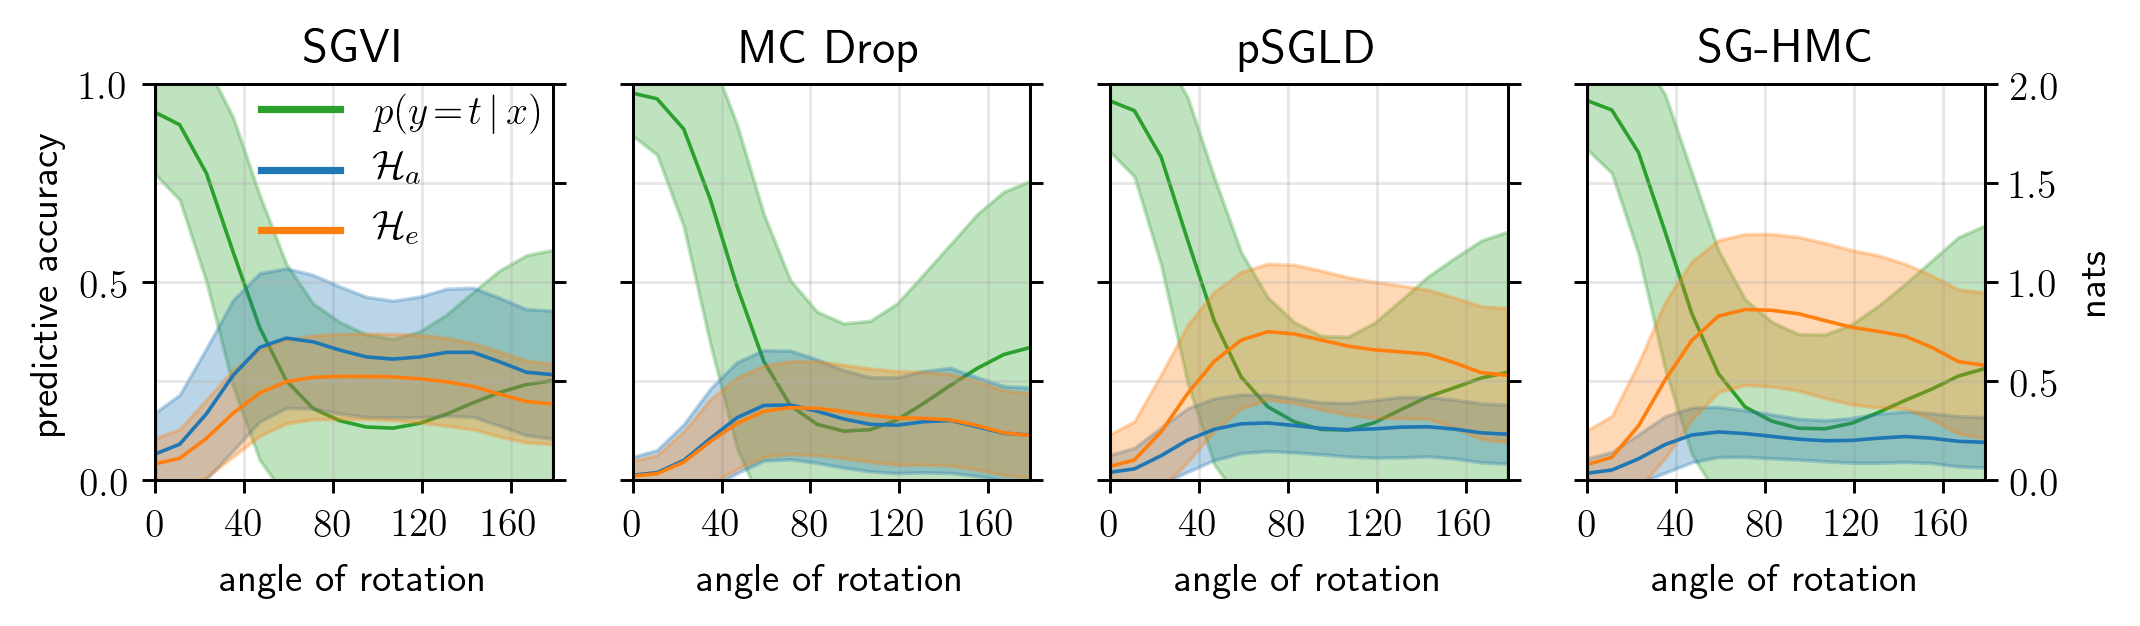

In [256]:
# s_rot = 0
# end_rot = 179
# steps = 16
# rotations = (np.linspace(s_rot, end_rot, steps)).astype(int)

# c = base_c10

# # result_name_list = ['results_weight_uncertainty_MC_MNIST_gaussian', 'results_bootstrap_ensemble_NN_MNIST', 'results_MC_dropout_MNIST', 'results_SGLD_MNIST', 'results_pSGLD_MNIST']
# # dirname = 'results_H_SGHMC_MNIST_convB'#, 'results_KLaplace_NN_MNIST' #'results_pSGLD_MNIST' # 'results_weight_uncertainty_local_reparam_MNIST2'#'results_weight_uncertainty_MC_MNIST_gaussian'#'results_bootstrap_ensemble_NN_MNIST'# 'results_MC_dropout_MNIST'# '

# dirnames = ["../advml_notebooks/results_weight_uncertainty_local_reparam_MNIST", "../advml_notebooks/results_MC_dropout_MNIST", "../advml_notebooks/results_pSGLD_MNIST", "../notebooks/results_H_SGHMC_MNIST"]

# names = ['SGVI', 'MC Drop', 'pSGLD', 'SG-HMC'] #'P-SGLD'#'MAP Ensemble' #'MC Dropout'# #  BBP Gaussian     MC Dropout     P-SGLD 'BBP Gaussian 2'

# # plt.figure(dpi=120)

# # fst=35
# # fs = 30
# alph = 0.3

# # plt.figure(dpi=120, figsize=(6, 5))

# fig, axx= plt.subplots(nrows=1, ncols=4, dpi=260, figsize=(width*1.5, width/3))
    
# for ii in range(4):
    
#     right= (ii == 3)
#     left= (ii == 0)
    
#     ax = axx[ii]
#     ax2 = axx[ii].twinx()

#     correct_preds = np.load(dirnames[ii] + '/correct_preds.npy')
#     all_preds = np.load(dirnames[ii] + '/all_preds.npy')
#     all_sample_preds = np.load(dirnames[ii] + '/all_sample_preds.npy')
#     all_sample_preds = all_sample_preds + 1e-8

#     # Get correct prediction probabilities
#     correct_mean = correct_preds.mean(axis=0)
#     correct_std = correct_preds.std(axis=0)

#     # Compute the approx posterior predictive
#     posterior_preds = all_sample_preds.mean(axis=1)
#     total_entropy = -(posterior_preds * np.log(posterior_preds)).sum(axis=2)
#     total_entropy_mean = total_entropy.mean(axis=0)
#     total_entropy_std = total_entropy.std(axis=0)

#     # Get sample wise metrics (entropy) -> aleatoric entropy
#     sample_preds_entropy = -( all_sample_preds * np.log(all_sample_preds) ).sum(axis=3)
#     aleatoric_entropy = sample_preds_entropy.mean(axis=1)
#     aleatoric_entropy_mean = aleatoric_entropy.mean(axis=0)
#     aleatoric_entropy_std = aleatoric_entropy.std(axis=0)

#     # Get epistemic entropy 
#     epistemic_entropy = total_entropy - aleatoric_entropy
#     epistemic_entropy_mean = epistemic_entropy.mean(axis=0)
#     epistemic_entropy_std = epistemic_entropy.std(axis=0)

#     aa, = errorfill(rotations, correct_mean, yerr=correct_std, color=c[2], alpha_fill=alph, ax=ax)

#     #     ax = plt.gca()
#     ax.set_xlabel('angle of rotation')
#     ax.set_title(names[ii])

#     ax2.yaxis.grid(alpha=0.3)
#     ax.xaxis.grid(alpha=0.3) 

#     ax2.set_yticks(np.arange(0, 2.5, 0.5))
#     ax.set_yticks(np.arange(0, 1.001, 0.5))

#     if not right:
#         ax2.set_yticklabels([])
#     else:
#         ax2.set_ylabel('nats')
#     if not left:
#         ax.set_yticklabels([])
#     else:
#         ax.set_ylabel('predictive accuracy')

#     xr = np.arange(0, 180, 40)
#     # xr[-1] = 179
#     ax.set_xticks(xr)

# #     bb, = errorfill(rotations, total_entropy_mean, yerr=total_entropy_std, color=c[0], ax=ax2, alpha_fill=alph)
#     cc, = errorfill(rotations, aleatoric_entropy_mean, yerr=aleatoric_entropy_std, color=c[0], ax=ax2, alpha_fill=alph)
#     dd, = errorfill(rotations, epistemic_entropy_mean, yerr=epistemic_entropy_std, color=c[1], ax=ax2, alpha_fill=alph)

#     # ax.title.set_fontsize(fst)
#     # for item in ([ax.xaxis.label, ax.yaxis.label] + [ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     #             ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
#     #     item.set_fontsize(fs)
#     #     item.set_weight('normal')

#     plt.autoscale(enable=True, axis='x', tight=True)
#     ax.set_ylim(bottom=0, top=1)
#     ax2.set_ylim(bottom=0, top=2)

    
# p_lgd = [aa, cc, dd]
# lgd = axx[0].legend(p_lgd, ["$p(y\!=\!t\,|\,x)$", '$\mathcal{H}_{a}$', '$\mathcal{H}_{e}$'],
#                     frameon=False, loc=1, bbox_to_anchor=[1.06, 1.07])

# for line in lgd.get_lines():
#     line.set_linewidth(2.0)
# # plt.tight_layout()
# # name = name.replace(" ", "")

# plt.savefig(savedir+'/c4/MNIST_rotation.pdf', format='pdf', bbox_inches='tight')


## Adversarial plots

In [539]:
# s_rot = 0
# end_rot = 179
# steps = 16
# rotations = (np.linspace(s_rot, end_rot, steps)).astype(int)

# c = base_c10

# # result_name_list = ['results_weight_uncertainty_MC_MNIST_gaussian', 'results_bootstrap_ensemble_NN_MNIST', 'results_MC_dropout_MNIST', 'results_SGLD_MNIST', 'results_pSGLD_MNIST']
# # dirname = 'results_H_SGHMC_MNIST_convB'#, 'results_KLaplace_NN_MNIST' #'results_pSGLD_MNIST' # 'results_weight_uncertainty_local_reparam_MNIST2'#'results_weight_uncertainty_MC_MNIST_gaussian'#'results_bootstrap_ensemble_NN_MNIST'# 'results_MC_dropout_MNIST'# '

# dirnames = ["../advml_notebooks/results_weight_uncertainty_local_reparam_MNIST", "../advml_notebooks/results_MC_dropout_MNIST", "../advml_notebooks/results_pSGLD_MNIST", "../notebooks/results_H_SGHMC_MNIST"]
# names = ['SGVI', 'MC Drop', 'pSGLD', 'SG-HMC'] #'P-SGLD'#'MAP Ensemble' #'MC Dropout'# #  BBP Gaussian     MC Dropout     P-SGLD 'BBP Gaussian 2'


# # plt.figure(dpi=120)

# # fst=35
# # fs = 30
# alph = 0.3


# targets = np.load('../advml_notebooks/MNIST_test_targets.npy')

# epsilon_vec = np.arange(0, 0.75, 0.05) 


# fig, axx= plt.subplots(nrows=1, ncols=4, dpi=260, figsize=(width*1.5, width/3))
    
# for ii in range(4):
    
#     right= (ii == 3)
#     left= (ii == 0)
    
#     ax = axx[ii]
#     ax2 = axx[ii].twinx()
    
#     if dirnames[ii] == 'results_regular_NN_MNIST':
#             all_sample_preds = np.load(dirnames[ii]+'/adversial/iter_adv_pred_vec.npy')
#             all_preds = np.swapaxes(all_sample_preds, 0, 1)
#     #         print(all_sample_preds.shape)
#     else:
#         all_sample_preds = np.swapaxes(np.load(dirnames[ii]+'/adversial/iter_adv_pred_vec.npy'), 0, 2)
#         all_preds = all_sample_preds.mean(axis=1)
#     all_sample_preds = all_sample_preds + 1e-5

#     #     print(all_preds.shape)
#     correct_preds = np.zeros((all_preds.shape[0], len(epsilon_vec)))
#     for i in range(all_preds.shape[0]):
#         correct_preds[i,:] = 1-all_preds[i,:,targets[i]]

#     # Get correct prediction probabilities
#     correct_mean = correct_preds.mean(axis=0)
#     correct_std = correct_preds.std(axis=0)

#     if dirname == 'results_regular_NN_MNIST':
#         pred_entropy = -(all_sample_preds * np.log(all_sample_preds)).sum(axis=2)
#         pred_entropy_mean = pred_entropy.mean(axis=1)
#         pred_entropy_std = pred_entropy.std(axis=1)
#     else:

#         # Compute the approx posterior predictive
#         posterior_preds = all_sample_preds.mean(axis=1)
#         total_entropy = -(posterior_preds * np.log(posterior_preds)).sum(axis=2)
#         total_entropy_mean = total_entropy.mean(axis=0)
#         total_entropy_std = total_entropy.std(axis=0)

#         # Get sample wise metrics (entropy) -> aleatoric entropy
#         sample_preds_entropy = -( all_sample_preds * np.log(all_sample_preds) ).sum(axis=3)
#         aleatoric_entropy = sample_preds_entropy.mean(axis=1)
#         aleatoric_entropy_mean = aleatoric_entropy.mean(axis=0)
#         aleatoric_entropy_std = aleatoric_entropy.std(axis=0)

#         # Get epistemic entropy 
#         epistemic_entropy = total_entropy - aleatoric_entropy
#         epistemic_entropy_mean = epistemic_entropy.mean(axis=0)
#         epistemic_entropy_std = epistemic_entropy.std(axis=0)


#     aa, = errorfill(epsilon_vec, correct_mean, yerr=correct_std, color=c[2], alpha_fill=0.25, ax=ax)

#     #     ax = plt.gca()
#     ax.set_xlabel('$\epsilon_{\mathit{FGSM}}$')
#     ax.set_title(names[ii])


#     ax2.yaxis.grid(alpha=0.3)
#     ax.xaxis.grid(alpha=0.3) 

#     ax2.set_yticks(np.arange(0, 2.5, 0.5))
#     ax.set_yticks(np.arange(0, 1.001, 0.5))

#     if not right:
#         ax2.set_yticklabels([])
#     else:
#         ax2.set_ylabel('nats')
#     if not left:
#         ax.set_yticklabels([])
#     else:
#         ax.set_ylabel("incorrect class prob")

#     xr = [0, 0.2, 0.4, 0.6]
#     # # xr[-1] = 179
#     ax.set_xticks(xr)


#     if dirname == 'results_regular_NN_MNIST':
#         cc, = errorfill(epsilon_vec, pred_entropy_mean, yerr=pred_entropy_std, color=c[1], ax=ax2, alpha_fill=alph)
#     else:
# #         bb, = errorfill(epsilon_vec, total_entropy_mean, yerr=total_entropy_std, color=c[0], ax=ax2, alpha_fill=alph)
#         cc, = errorfill(epsilon_vec, aleatoric_entropy_mean, yerr=aleatoric_entropy_std, color=c[0], ax=ax2, alpha_fill=alph)
#         dd, = errorfill(epsilon_vec, epistemic_entropy_mean, yerr=epistemic_entropy_std, color=c[1], ax=ax2, alpha_fill=alph)

#     # ax.title.set_fontsize(fst)
#     # for item in ([ax.xaxis.label, ax.yaxis.label] + [ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     #             ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
#     #     item.set_fontsize(fs)
#     #     item.set_weight('normal')

#     plt.autoscale(enable=True, axis='x', tight=True)
#     ax.set_ylim(bottom=0, top=1)
#     ax2.set_ylim(bottom=0, top=2)


# p_lgd = [aa, cc, dd]
# lgd = axx[3].legend(p_lgd, ["$1-p(y\!=\!t\,|\,x)$", '$\mathcal{H}_{a}$', '$\mathcal{H}_{e}$'],
#                  frameon=False, loc=1, bbox_to_anchor=[1.05, 1.07])

# for line in lgd.get_lines():
#     line.set_linewidth(2.0)
#     # plt.tight_layout()

# plt.savefig(savedir+'/c4/MNIST_adv.pdf', format='pdf', bbox_inches='tight')




## KMNIST

(100, 10000, 10)
(100, 10000, 10)
(90, 10000, 10)
(242, 10000, 10)


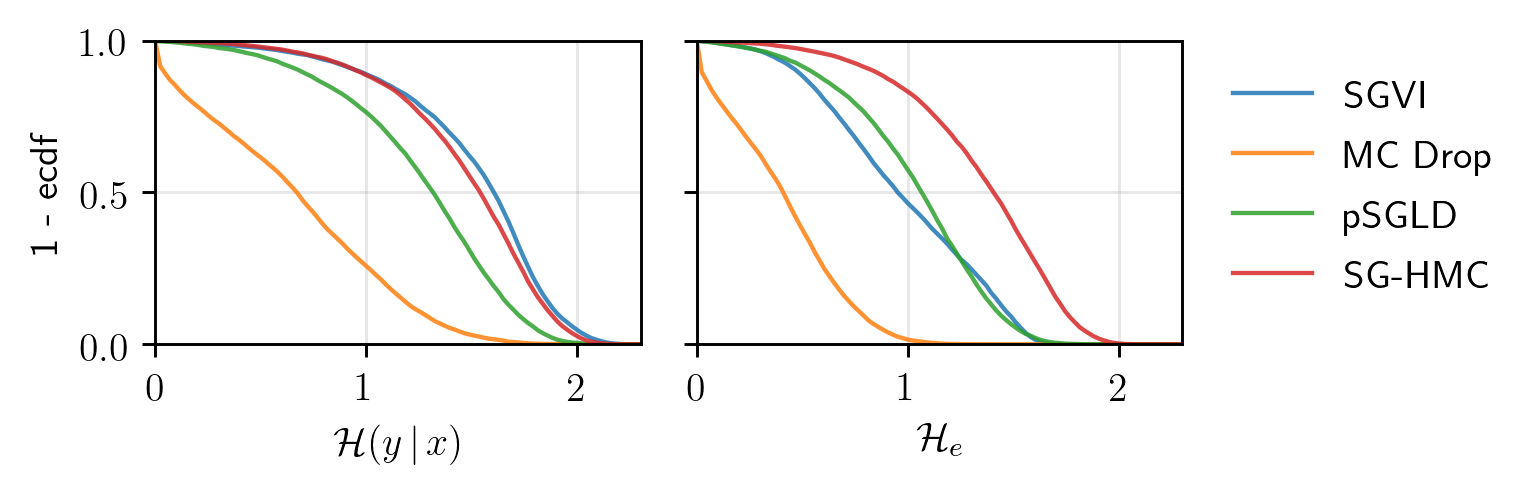

In [277]:
# from statsmodels.distributions.empirical_distribution import ECDF


# dirnames = ["../advml_notebooks/results_weight_uncertainty_local_reparam_MNIST", "../advml_notebooks/results_MC_dropout_MNIST", "../advml_notebooks/results_pSGLD_MNIST", "../notebooks/results_H_SGHMC_MNIST"]
# names = ['SGVI', 'MC Drop', 'pSGLD', 'SG-HMC'] #'P-SGLD'#'MAP Ensemble' #'MC Dropout'# #  BBP Gaussian     MC Dropout     P-SGLD 'BBP Gaussian 2'


# eps = 1e-10
# lw=1.2


# fig, axx= plt.subplots(nrows=1, ncols=2, dpi=260, figsize=(width, width/3))

# ax = axx[0]

# for model_idx, dirname in enumerate(dirnames):
    
#     all_sample_preds = np.load(dirname+'/KMNIST_testpreds.npy')
    
    
#     if dirname == 'results_regular_NN_MNIST':
# #         print(all_sample_preds.shape)
#         total_entropy = -(all_sample_preds * np.log(all_sample_preds + eps)).sum(axis=1)
# #         total_entropy_mean = total_entropy.mean(axis=1)
# #         total_entropy_std = total_entropy.std(axis=1)
#     else:
#         print(all_sample_preds.shape)
#         # Compute the approx posterior predictive
#         posterior_preds = all_sample_preds.mean(axis=0)
#         total_entropy = -(posterior_preds * np.log(posterior_preds + eps)).sum(axis=1)
# #         total_entropy_mean = total_entropy.mean(axis=0)
# #         total_entropy_std = total_entropy.std(axis=0)
    
#     ecdf = ECDF(total_entropy)
#     evalrange = np.linspace(0, -np.log(0.1), 100)
    
#     ax.plot(evalrange, 1-ecdf(evalrange), '-', label=names[model_idx], alpha=0.85, lw=lw, c=c[model_idx])
    
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.autoscale(enable=True, axis='y', tight=True)
    
# ax.set_xlabel('$\mathcal{H}(y\,|\,x)$')
# ax.set_ylabel('1 - ecdf')
# # ax.set_title('KMNIST (OOD Dataset) Uncertainty')

# # ax.set_xlabel('predictive entropy, $\mathcal{H}(y\'\,|\,x\')$')
# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)
# plt.tight_layout()
# ##########################################################################################
# ax = axx[1]

# for model_idx, dirname in enumerate(dirnames):
    
#     all_sample_preds = np.load(dirname+'/KMNIST_testpreds.npy') + 1e-6
    

# #         print(all_sample_preds.shape)
#     # Compute the approx posterior predictive
#     posterior_preds = all_sample_preds.mean(axis=0)
#     total_entropy = -(posterior_preds * np.log(posterior_preds + eps)).sum(axis=1)
# # Get sample wise metrics (entropy) -> aleatoric entropy
# #     print(all_sample_preds.shape)
#     sample_preds_entropy = -( all_sample_preds * np.log(all_sample_preds + eps) ).sum(axis=2)
#     aleatoric_entropy = sample_preds_entropy.mean(axis=0)

#     # Get epistemic entropy 
#     epistemic_entropy = total_entropy - aleatoric_entropy
    
#     ecdf = ECDF(epistemic_entropy)
#     evalrange = np.linspace(0, -np.log(0.1), 100)
    
#     ax.plot(evalrange, 1-ecdf(evalrange), '-', label=names[model_idx], alpha=0.85, lw=lw, c=c[model_idx])
    
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.autoscale(enable=True, axis='y', tight=True)
    
# ax.set_xlabel('$\mathcal{H}_{e}$')
# ax.set_yticklabels([])

# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)


# lgd = ax.legend(frameon=False, bbox_to_anchor=(1.03,1))
# plt.tight_layout()

# plt.savefig(savedir+'/c4/KMNIST.pdf', format='pdf', bbox_inches='tight')#, bbox_extra_artists=(lgd,)

## MNIST vis page

In [33]:




fig, ax = plt.subplots(nrows=4, ncols=5, dpi=260, figsize=(width*1, width*0.66))


for row_ in range(4):
    rows = [0, 2, 3, 5]
    mask_idxs = [62, 2, 9, 5, 24, 50]
    
    row = rows[row_]
    col = 0

    [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('./plots/c4/fido_real_MNIST.npy', allow_pickle=True)


    ax[row_][col].imshow(1-og_x_vec[row], cmap='gray')
    if row == 0:
        ax[row_][col].set_title('Original')
#     ax[row][col].set_title()
#     ax[row][col].set_xlabel('$H=%3.2f$' % (og_h_vec[row]) + ' ' + str(og_p_vec[row][:5]))
    ax[row_][col].axis('off')


    col = 3
    ax[row_][col].imshow(1-ex_x_vec[row], cmap='gray')
    if row == 0:
        ax[row_][col].set_title('U-FIDO')
#     ax[row][col].set_xlabel('$H=%3.2f$' % (ex_h_vec[row])+ ' ' + str(ex_p_vec[row][:5]))
    ax[row_][col].axis('off')


    col = 4
    mask = ex_mask_vec[0]
    mask_pos = np.repeat(np.expand_dims(mask[mask_idxs[row],:].view(28, 28).data.cpu().numpy(), axis=2), 4, axis=2)
    mask_pos[:,:,1:3] = 0
    ax[row_][col].imshow(1-og_x_vec[row], cmap='gray')
    ax[row_][col].imshow(mask_pos, alpha=0.45)
    if row == 0:
        ax[row_][col].set_title('U-FIDO Mask')
    ax[row_][col].axis('off')


    [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('./plots/c4/z_real_MNIST.npy', allow_pickle=True)


    col = 1
    ax[row_][col].imshow(1-ex_x_vec[row], cmap='gray')
    if row == 0:
        ax[row_][col].set_title('CLUE')
#     ax[row][col].set_title('$H=%3.2f$' % (ex_h_vec[row]))
    ax[row_][col].set_xlabel(ex_p_vec[row][:5])
    ax[row_][col].axis('off')

    mask = ex_mask_vec[0]
    mask_neg = -mask[mask_idxs[row],0,:,:]
    mask_neg[mask_neg < 1e-3] = 0
    mask_neg = np.repeat(np.expand_dims(mask_neg, axis=2), 4, axis=2)*2
    mask_neg[:,:,0:2] = 0

    mask_pos = mask[mask_idxs[row],0,:,:]
    mask_pos[mask_pos < 1e-3] = 0
    mask_pos = np.repeat(np.expand_dims(mask_pos, axis=2), 4, axis=2)*2
    mask_pos[:,:,1:3] = 0


    col = 2
    ax[row_][col].imshow(1-og_x_vec[row], cmap='gray')
    ax[row_][col].imshow(mask_pos*1.2, alpha=0.5)#,  vmin=0, vmax=1)
    ax[row_][col].imshow(mask_neg, alpha=0.8)
    if row == 0:
        ax[row_][col].set_title('CLUE Mask')
    ax[row_][col].axis('off')


plt.savefig('plots/c4/real_MNIST_explain_s4.pdf', format='pdf', bbox_inches='tight')
    

NameError: name 'width' is not defined

#### Now MNIST from the artificial digits

In [385]:




# fig, ax = plt.subplots(nrows=4, ncols=5, dpi=260, figsize=(width*1, width*0.666))


# for row in range(4):
    
# #     mask_idxs = [62, 2, 9, 5, 24, 50]
    
#     col = 0

#     [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('./plots/c4/fido_art_MNIST.npy', allow_pickle=True)


#     ax[row][col].imshow(1-og_x_vec[row], cmap='gray')
#     if row == 0:
#         ax[row][col].set_title('Original')
# #     ax[row][col].set_title()
# #     ax[row][col].set_xlabel('$H=%3.2f$' % (og_h_vec[row]) + ' ' + str(og_p_vec[row][:5]))
#     ax[row][col].axis('off')


#     col = 3
#     ax[row][col].imshow(1-ex_x_vec[row], cmap='gray')
#     if row == 0:
#         ax[row][col].set_title('U-FIDO')
# #     ax[row][col].set_xlabel('$H=%3.2f$' % (ex_h_vec[row])+ ' ' + str(ex_p_vec[row][:5]))
#     ax[row][col].axis('off')


#     col = 4
#     mask = ex_mask_vec[row]
#     mask_pos = np.repeat(np.expand_dims(mask, axis=2), 4, axis=2)
#     mask_pos[:,:,1:3] = 0
#     ax[row][col].imshow(1-og_x_vec[row], cmap='gray')
#     ax[row][col].imshow(mask_pos, alpha=0.45)
#     if row == 0:
#         ax[row][col].set_title('U-FIDO Mask')
#     ax[row][col].axis('off')


#     [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('./plots/c4/z_art_MNIST.npy', allow_pickle=True)


#     col = 1
#     ax[row][col].imshow(1-ex_x_vec[row], cmap='gray')
#     if row == 0:
#         ax[row][col].set_title('CLUE')
# #     ax[row][col].set_title('$H=%3.2f$' % (ex_h_vec[row]))
#     ax[row][col].set_xlabel(ex_p_vec[row][:5])
#     ax[row][col].axis('off')
    
#     mask = ex_mask_vec[row]
    
#     mask_neg = -mask
#     mask_neg[mask_neg < 1e-3] = 0
#     mask_neg = np.repeat(np.expand_dims(mask_neg, axis=2), 4, axis=2)
#     mask_neg[:,:,0:2] = 0

#     mask_pos = mask
#     mask_pos[mask_pos < 1e-3] = 0
#     mask_pos = np.repeat(np.expand_dims(mask_pos, axis=2), 4, axis=2)
#     mask_pos[:,:,1:3] = 0


#     col = 2
#     ax[row][col].imshow(1-og_x_vec[row], cmap='gray')
#     ax[row][col].imshow(mask_pos*5.5, alpha=0.5)#,  vmin=mask_pos.min(), vmax=mask_pos.max())
#     ax[row][col].imshow(mask_neg*6, alpha=0.8)#,  vmin=mask_neg.min(), vmax=mask_neg.max())
#     if row == 0:
#         ax[row][col].set_title('CLUE Mask')
#     ax[row][col].axis('off')


# plt.savefig('plots/c4/art_MNIST_explain_s.pdf', format='pdf', bbox_inches='tight')
    

## mix 

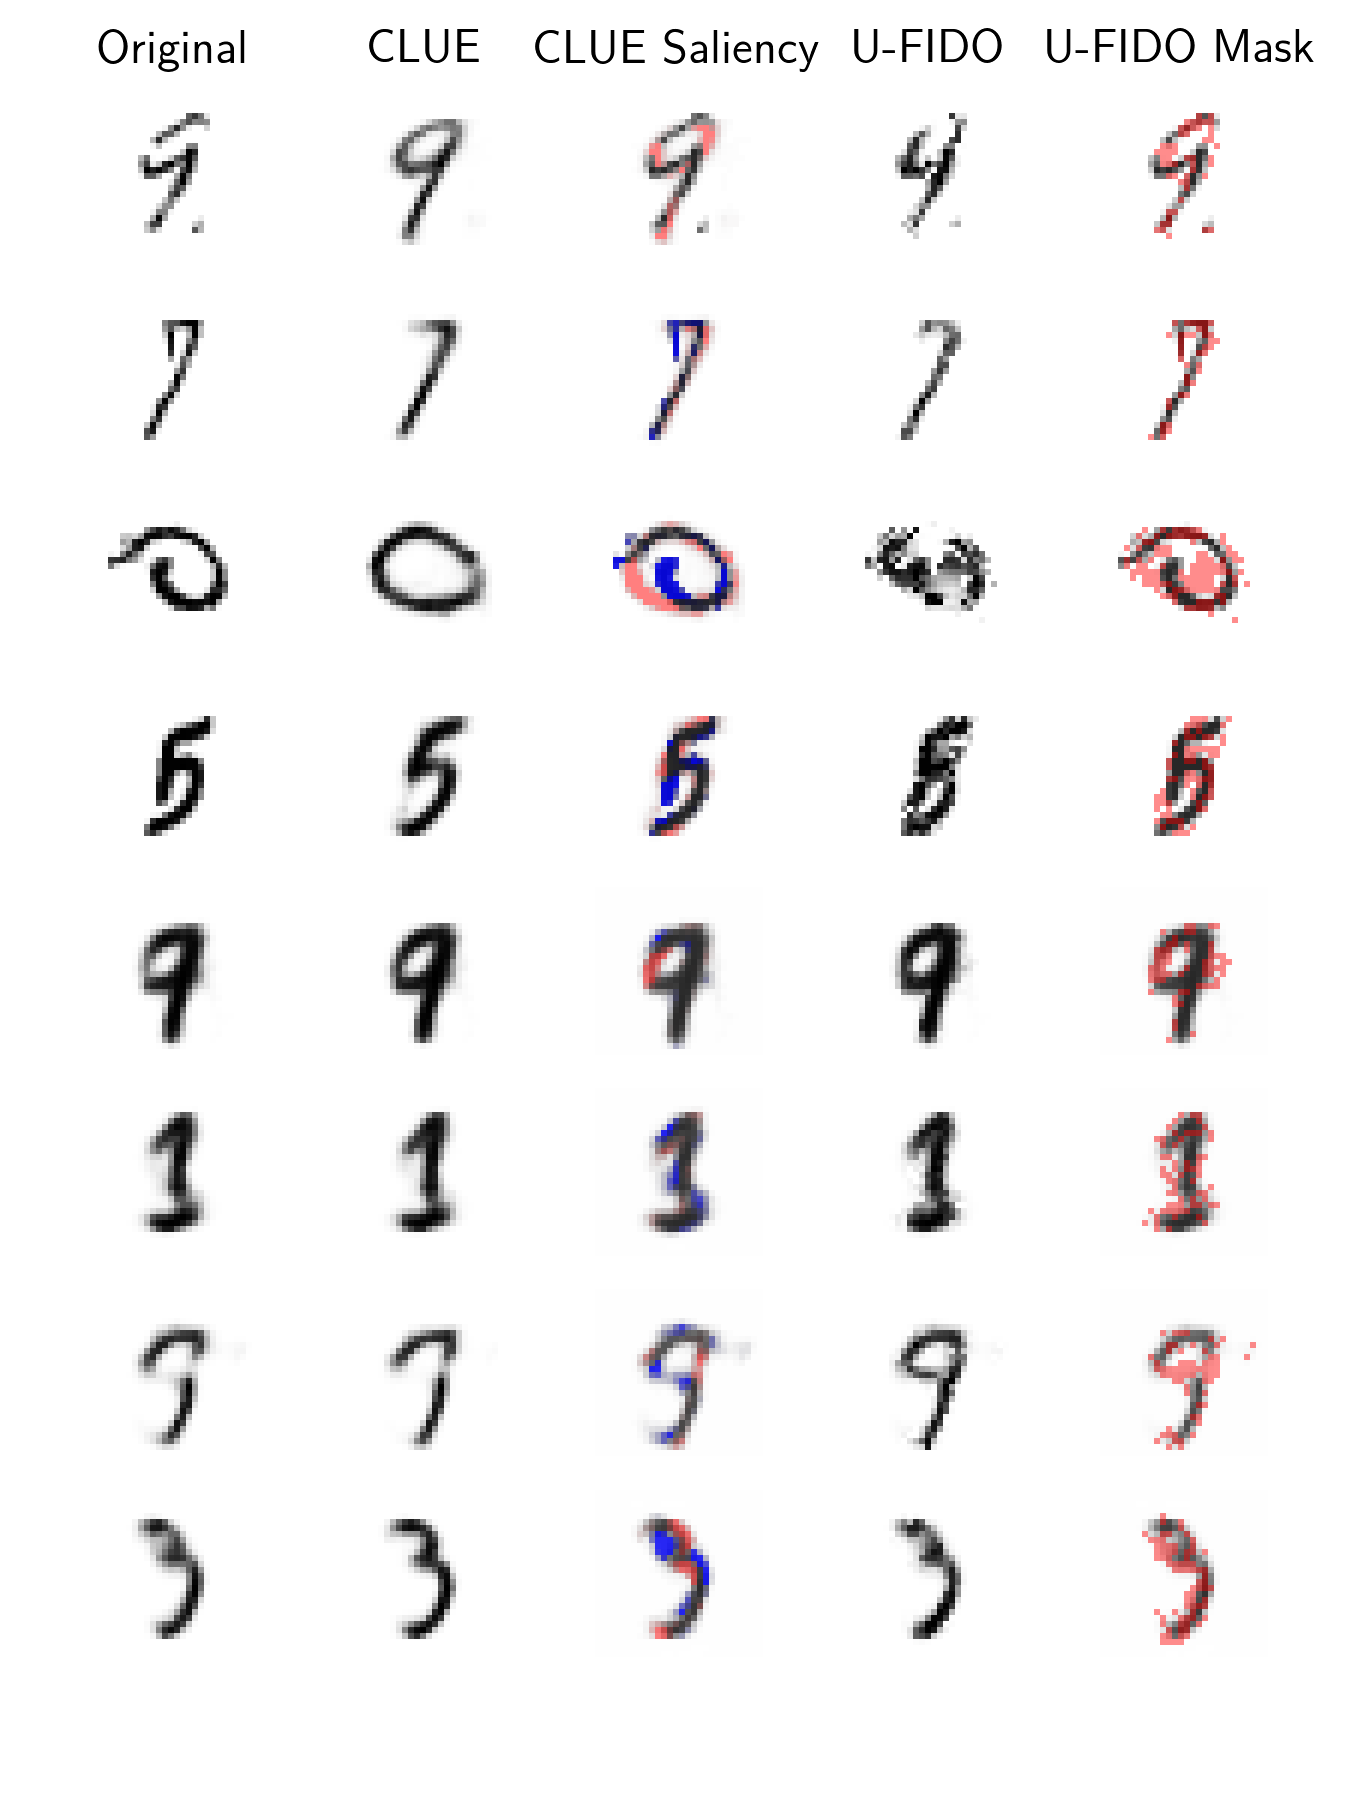

In [297]:
def alpha_im(im, alpha):
    a = np.repeat(np.expand_dims(im, axis=2), 4, axis=2)
    a[:,:,3] = alpha
    return a

alpha_4_im = 0.85

fig, ax = plt.subplots(nrows=8, ncols=5, dpi=260, figsize=(width*1, width*1.324))


for row_ in range(4):
    rows = [0, 2, 3, 5]
    mask_idxs = [62, 2, 9, 5, 24, 50]
    
    row = rows[row_]
    col = 0

    [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('./plots/c4/fido_real_MNIST.npy', allow_pickle=True)


#     ax[row_][col].imshow(1-og_x_vec[row], cmap='gray')
    ax[row_][col].imshow(1-og_x_vec[row], cmap='gray')
    if row == 0:
        ax[row_][col].set_title('Original')
#     ax[row][col].set_title()
#     ax[row][col].set_xlabel('$H=%3.2f$' % (og_h_vec[row]) + ' ' + str(og_p_vec[row][:5]))
    ax[row_][col].axis('off')


    col = 3
    ax[row_][col].imshow(1-ex_x_vec[row], cmap='gray')
    if row == 0:
        ax[row_][col].set_title('U-FIDO')
#     ax[row][col].set_xlabel('$H=%3.2f$' % (ex_h_vec[row])+ ' ' + str(ex_p_vec[row][:5]))
    ax[row_][col].axis('off')


    col = 4
    mask = ex_mask_vec[0]
    mask_pos = np.repeat(np.expand_dims(mask[mask_idxs[row],:].view(28, 28).data.cpu().numpy(), axis=2), 4, axis=2)
    mask_pos[:,:,1:3] = 0
    ax[row_][col].imshow(alpha_im(1-og_x_vec[row], alpha_4_im), cmap='gray')
    ax[row_][col].imshow(mask_pos, alpha=0.45)
    if row == 0:
        ax[row_][col].set_title('U-FIDO Mask')
    ax[row_][col].axis('off')


    [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('./plots/c4/z_real_MNIST.npy', allow_pickle=True)


    col = 1
    ax[row_][col].imshow(1-ex_x_vec[row], cmap='gray')
    if row == 0:
        ax[row_][col].set_title('CLUE')
#     ax[row][col].set_title('$H=%3.2f$' % (ex_h_vec[row]))
    ax[row_][col].set_xlabel(ex_p_vec[row][:5])
    ax[row_][col].axis('off')

    mask = ex_mask_vec[0]
    mask_neg = -mask[mask_idxs[row],0,:,:]
    mask_neg[mask_neg < 1e-3] = 0
    mask_neg = np.repeat(np.expand_dims(mask_neg, axis=2), 4, axis=2)*2
    mask_neg[:,:,0:2] = 0

    mask_pos = mask[mask_idxs[row],0,:,:]
    mask_pos[mask_pos < 1e-3] = 0
    mask_pos = np.repeat(np.expand_dims(mask_pos, axis=2), 4, axis=2)*2
    mask_pos[:,:,1:3] = 0


    col = 2
    ax[row_][col].imshow(alpha_im(1-og_x_vec[row], alpha_4_im), cmap='gray')
    ax[row_][col].imshow(mask_pos*1.2, alpha=0.5)#,  vmin=0, vmax=1)
    ax[row_][col].imshow(mask_neg, alpha=0.8)
    if row == 0:
        ax[row_][col].set_title('CLUE Saliency')
    ax[row_][col].axis('off')


    

for row in range(0,4):
    
#     mask_idxs = [62, 2, 9, 5, 24, 50]
    
    col = 0

    [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('./plots/c4/fido_art_MNIST.npy', allow_pickle=True)


    ax[row+4][col].imshow(1-og_x_vec[row], cmap='gray')
#     if row == 0:
#         ax[row+4][col].set_title('Original')
#     ax[row][col].set_title()
#     ax[row][col].set_xlabel('$H=%3.2f$' % (og_h_vec[row]) + ' ' + str(og_p_vec[row][:5]))
    ax[row+4][col].axis('off')


    col = 3
    ax[row+4][col].imshow(1-ex_x_vec[row], cmap='gray')
#     if row == 0:
#         ax[row+4][col].set_title('U-FIDO')
#     ax[row][col].set_xlabel('$H=%3.2f$' % (ex_h_vec[row])+ ' ' + str(ex_p_vec[row][:5]))
    ax[row+4][col].axis('off')


    col = 4
    mask = ex_mask_vec[row]
    mask_pos = np.repeat(np.expand_dims(mask, axis=2), 4, axis=2)
    mask_pos[:,:,1:3] = 0
    ax[row+4][col].imshow(alpha_im(1-og_x_vec[row],alpha_4_im), cmap='gray')
    ax[row+4][col].imshow(mask_pos, alpha=0.45)
#     if row == 0:
#         ax[row+4][col].set_title('U-FIDO Mask')
    ax[row+4][col].axis('off')


    [og_h_vec, og_p_vec, og_x_vec, ex_h_vec, ex_p_vec, ex_x_vec, ex_mask_vec] = np.load('./plots/c4/z_art_MNIST.npy', allow_pickle=True)


    col = 1
    ax[row+4][col].imshow(1-ex_x_vec[row], cmap='gray')
#     if row == 0:
#         ax[row+4][col].set_title('CLUE')
#     ax[row][col].set_title('$H=%3.2f$' % (ex_h_vec[row]))
    ax[row+4][col].set_xlabel(ex_p_vec[row][:5])
    ax[row+4][col].axis('off')
    
    mask = ex_mask_vec[row]
    
    mask_neg = -mask
    mask_neg[mask_neg < 1e-3] = 0
    mask_neg = np.repeat(np.expand_dims(mask_neg, axis=2), 4, axis=2)
    mask_neg[:,:,0:2] = 0

    mask_pos = mask
    mask_pos[mask_pos < 1e-3] = 0
    mask_pos = np.repeat(np.expand_dims(mask_pos, axis=2), 4, axis=2)
    mask_pos[:,:,1:3] = 0


    col = 2
    
    
    
    ax[row+4][col].imshow(alpha_im(1-og_x_vec[row],alpha_4_im), cmap='gray')
    ax[row+4][col].imshow(mask_pos*5.5, alpha=0.5)#,  vmin=mask_pos.min(), vmax=mask_pos.max())
    ax[row+4][col].imshow(mask_neg*6, alpha=0.8)#,  vmin=mask_neg.min(), vmax=mask_neg.max())
#     if row == 0:
#         ax[row+4][col].set_title('CLUE Mask')
    ax[row+4][col].axis('off')


plt.savefig('plots/c4/art_MNIST_mix.pdf', format='pdf', bbox_inches='tight')
    
    
    

## Ground truth Experiment Boxplots

#### data vectors are saved, will have to load them up to build histograms

### MNIST aleatoric

In [466]:

# art_test = np.load('./notebooks/experiment_data/art_MNIST/x_art_test.npy')
# art_test = art_test.reshape((art_test.shape[0], -1))
# ref_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_reference_entropy.npy')
# baseline_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/baseline_BNN_aleatoric_entropy.npy')


# sensitivity_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/sensitivity_BNN_aleatoric_entropy_0.1.npy')
# sensitivity_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_sensitivity_explanations_0.1.npy')
# sensitivity_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_sensitivity_marg_entropy_0.1.npy')

# # Note that need to add gaussian to distance
# FIDO_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_FIDO_nocheat_explanations.npy')
# FIDO_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_FIDO_nocheat_marg_entropy.npy')

# z_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_z_explanations.npy')
# z_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_z_marg_entropy.npy')

# z_aleatoric_entropy[z_aleatoric_entropy>ref_aleatoric_entropy] = z_aleatoric_entropy[z_aleatoric_entropy>ref_aleatoric_entropy] / 12


Text(0.5,1,'MNIST')

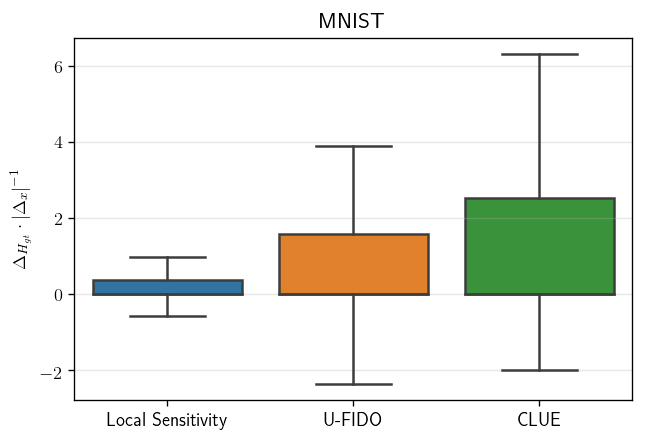

In [486]:



# delta_sensitivity = (ref_aleatoric_entropy - sensitivity_aleatoric_entropy) / (np.abs(art_test - sensitivity_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_FIDO = (ref_aleatoric_entropy - FIDO_aleatoric_entropy) / (np.abs(art_test - FIDO_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_z = (ref_aleatoric_entropy - z_aleatoric_entropy) / (np.abs(art_test - z_aleatoric_explanations).mean(axis=1) + 1e-5)

# to_box_data = [delta_sensitivity, delta_FIDO, delta_z]


# plt.figure(dpi=120)
# ax = plt.gca()
# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)
# sns.boxplot(x=None, y=None, hue=None, data=to_box_data, order=None, hue_order=None,
#                         orient='v', color=None, palette=None, saturation=0.75, width=0.8, dodge=True,
#                         showfliers=False, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax)

# ax.set_xticklabels(['Local Sensitivity', 'U-FIDO', 'CLUE'])
# ax.set_ylabel('$\Delta_{H_{\mathit{gt}}} \cdot |\Delta_{x}|^{-1}$')
# ax.set_title('MNIST')


## extract MNIST std

In [88]:

# art_test = np.load('./notebooks/experiment_data/art_MNIST/x_art_test.npy')
# art_test = art_test.reshape((art_test.shape[0], -1))
# baseline_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/baseline_BNN_aleatoric_entropy.npy')
# ref_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_reference_entropy.npy')
# test_px = np.load('./notebooks/experiment_data/art_MNIST/baseline_log_px.npy')


# sensitivity_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/sensitivity_BNN_aleatoric_entropy.npy')
# sensitivity_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_sensitivity_explanations_0.1.npy')
# sensitivity_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_sensitivity_marg_entropy_0.1.npy')
# sensitivity_diff = np.abs(art_test - sensitivity_aleatoric_explanations)
# sensitivity_px = np.load('./notebooks/experiment_data/art_MNIST/sensitivity_aleatoric_log_px.npy')


# FIDO_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/FIDO_nocheat_BNN_aleatoric_entropy.npy')
# FIDO_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_FIDO_nocheat_explanations.npy')
# FIDO_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_FIDO_nocheat_marg_entropy.npy')
# FIDO_diff = np.abs(art_test - FIDO_aleatoric_explanations)
# FIDO_px = np.load('./notebooks/experiment_data/art_MNIST/FIDO_nocheat_aleatoric_log_px.npy')


# z_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/z_BNN_aleatoric_entropy.npy')
# z_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_z_explanations.npy')
# z_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_z_marg_entropy.npy')
# z_diff = np.abs(art_test - z_aleatoric_explanations)
# z_px = np.load('./notebooks/experiment_data/art_MNIST/z_aleatoric_log_px.npy')
# # print((ref_aleatoric_entropy.mean() - z_aleatoric_entropy.mean()) / z_diff.mean())


## MNISt epistemic std

In [89]:

# art_test = np.load('./notebooks/experiment_data/art_MNIST/x_art_test.npy')
# art_test = art_test.reshape((art_test.shape[0], -1))
# baseline_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/OG_BNN_epistemic_entropy.npy')
# ref_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/baseline_epistemic_class_loglikes.npy')
# test_px = np.load('./notebooks/experiment_data/art_MNIST/baseline_log_px.npy')


# sensitivity_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/sensitivity_BNN_epistemic_entropy.npy')
# # sensitivity_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_sensitivity_explanations_0.1.npy')
# sensitivity_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_sensitivity_marg_entropy_0.1.npy')
# # sensitivity_diff = np.abs(art_test - sensitivity_aleatoric_explanations)
# sensitivity_px = np.load('./notebooks/experiment_data/art_MNIST/sensitivity_epistemic_log_px.npy')


# FIDO_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/FIDO_nocheat_BNN_epistemic_entropy.npy')
# # FIDO_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_FIDO_nocheat_explanations.npy')
# # FIDO_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_FIDO_nocheat_marg_entropy.npy')
# # FIDO_diff = np.abs(art_test - FIDO_aleatoric_explanations)
# FIDO_px = np.load('./notebooks/experiment_data/art_MNIST/FIDO_nocheat_epistemic_log_px.npy')


# z_BNN_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/z_BNN_epistemic_entropy.npy')
# # z_aleatoric_explanations = np.load('./notebooks/experiment_data/art_MNIST/aleatoric_z_explanations.npy')
# # z_aleatoric_entropy = np.load('./notebooks/experiment_data/art_MNIST/y_cond_aleatoric_z_marg_entropy.npy')
# # z_diff = np.abs(art_test - z_aleatoric_explanations)
# z_px = np.load('./notebooks/experiment_data/art_MNIST/z_epistemic_log_px.npy')
# # print((ref_aleatoric_entropy.mean() - z_aleatoric_entropy.mean()) / z_diff.mean())



In [87]:

print(sensitivity_px.mean(), sensitivity_px.std())


-486.7751 96.56797


## Wine aleatoric

In [506]:

# art_test = np.load('./notebooks/experiment_data/art_wine/x_art_test.npy')
# art_test = art_test.reshape((art_test.shape[0], -1))
# ref_aleatoric_entropy = np.load('./notebooks/experiment_data/art_wine/aleatoric_reference_marg_std.npy')


# sensitivity_aleatoric_explanations = np.load('./notebooks/experiment_data/art_wine/aleatoric_sensitivity_explanations_0.3.npy')
# sensitivity_aleatoric_entropy = np.load('./notebooks/experiment_data/art_wine/y_cond_aleatoric_sensitivity_marg_std_0.3.npy')

# # Note that need to add gaussian to distance
# FIDO_aleatoric_explanations = np.load('./notebooks/experiment_data/art_wine/aleatoric_FIDO_explanations.npy')
# FIDO_aleatoric_entropy = np.load('./notebooks/experiment_data/art_wine/y_cond_aleatoric_FIDO_marg_std.npy')

# z_aleatoric_explanations = np.load('./notebooks/experiment_data/art_wine/z_aleatoric_explanations.npy')
# z_aleatoric_entropy = np.load('./notebooks/experiment_data/art_wine/y_cond_z_aleatoric_marg_std.npy')

# z_aleatoric_entropy[z_aleatoric_entropy>ref_aleatoric_entropy] = z_aleatoric_entropy[z_aleatoric_entropy>ref_aleatoric_entropy] / 1.03



Text(0.5,1,'Wine')

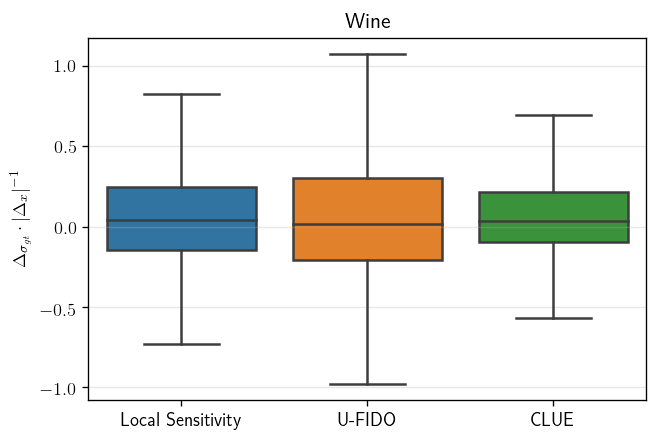

In [507]:



# delta_sensitivity = (ref_aleatoric_entropy - sensitivity_aleatoric_entropy) / (np.abs(art_test - sensitivity_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_FIDO = (ref_aleatoric_entropy - FIDO_aleatoric_entropy) / (np.abs(art_test - FIDO_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_z = (ref_aleatoric_entropy - z_aleatoric_entropy) / (np.abs(art_test - z_aleatoric_explanations).mean(axis=1) + 1e-5)

# to_box_data = [delta_sensitivity, delta_FIDO, delta_z]


# plt.figure(dpi=120)
# ax = plt.gca()
# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)
# sns.boxplot(x=None, y=None, hue=None, data=to_box_data, order=None, hue_order=None,
#                         orient='v', color=None, palette=None, saturation=0.75, width=0.8, dodge=True,
#                         showfliers=False, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax)

# ax.set_xticklabels(['Local Sensitivity', 'U-FIDO', 'CLUE'])
# ax.set_ylabel('$\Delta_{\sigma_{\mathit{gt}}} \cdot |\Delta_{x}|^{-1}$')
# ax.set_title('Wine')



## boston aleatoric

In [524]:

# art_test = np.load('./notebooks/experiment_data/art_boston/x_art_test.npy')
# art_test = art_test.reshape((art_test.shape[0], -1))
# ref_aleatoric_entropy = np.load('./notebooks/experiment_data/art_boston/aleatoric_reference_marg_std.npy')


# sensitivity_aleatoric_explanations = np.load('./notebooks/experiment_data/art_boston/aleatoric_sensitivity_explanations_0.3.npy')
# sensitivity_aleatoric_entropy = np.load('./notebooks/experiment_data/art_boston/y_cond_aleatoric_sensitivity_marg_std_0.3.npy')

# # Note that need to add gaussian to distance
# FIDO_aleatoric_explanations = np.load('./notebooks/experiment_data/art_boston/aleatoric_FIDO_explanations.npy')
# FIDO_aleatoric_entropy = np.load('./notebooks/experiment_data/art_boston/y_cond_aleatoric_FIDO_marg_std.npy')

# z_aleatoric_explanations = np.load('./notebooks/experiment_data/art_boston/z_aleatoric_explanations.npy')
# z_aleatoric_entropy = np.load('./notebooks/experiment_data/art_boston/y_cond_z_aleatoric_marg_std.npy')




Text(0.5,1,'Boston')

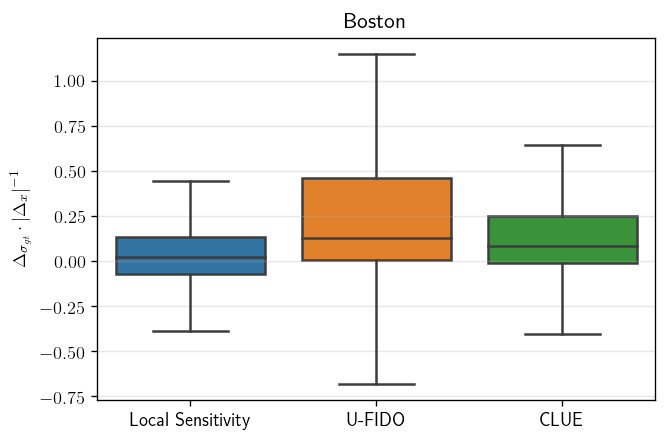

In [525]:



# delta_sensitivity = (ref_aleatoric_entropy - sensitivity_aleatoric_entropy) / (np.abs(art_test - sensitivity_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_FIDO = (ref_aleatoric_entropy - FIDO_aleatoric_entropy) / (np.abs(art_test - FIDO_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_z = (ref_aleatoric_entropy - z_aleatoric_entropy) / (np.abs(art_test - z_aleatoric_explanations).mean(axis=1) + 1e-5)

# to_box_data = [delta_sensitivity, delta_FIDO, delta_z]


# plt.figure(dpi=120)
# ax = plt.gca()
# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)
# sns.boxplot(x=None, y=None, hue=None, data=to_box_data, order=None, hue_order=None,
#                         orient='v', color=None, palette=None, saturation=0.75, width=0.8, dodge=True,
#                         showfliers=False, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax)

# ax.set_xticklabels(['Local Sensitivity', 'U-FIDO', 'CLUE'])
# ax.set_ylabel('$\Delta_{\sigma_{\mathit{gt}}} \cdot |\Delta_{x}|^{-1}$')
# ax.set_title('Boston')




## credit aleatoric

In [516]:

# art_test = np.load('./notebooks/experiment_data/art_default_credit/x_art_test.npy')
# art_test = art_test.reshape((art_test.shape[0], -1))
# ref_aleatoric_entropy = np.load('./notebooks/experiment_data/art_default_credit/aleatoric_reference_marg_entropy.npy')


# sensitivity_aleatoric_explanations = np.load('./notebooks/experiment_data/art_default_credit/aleatoric_sensitivity_explanations_0.3.npy')
# sensitivity_aleatoric_entropy = np.load('./notebooks/experiment_data/art_default_credit/y_cond_aleatoric_sensitivity_marg_entropy_0.3.npy')

# # Note that need to add gaussian to distance
# FIDO_aleatoric_explanations = np.load('./notebooks/experiment_data/art_default_credit/aleatoric_FIDO_explanations.npy')
# FIDO_aleatoric_entropy = np.load('./notebooks/experiment_data/art_default_credit/y_cond_aleatoric_FIDO_marg_entropy.npy')

# z_aleatoric_explanations = np.load('./notebooks/experiment_data/art_default_credit/z_aleatoric_explanations.npy')
# z_aleatoric_entropy = np.load('./notebooks/experiment_data/art_default_credit/y_cond_z_aleatoric_marg_entropy.npy')



Text(0.5,1,'Credit')

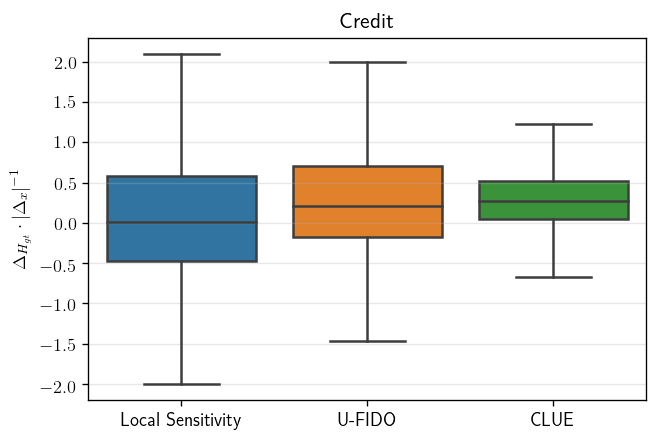

In [517]:


# delta_sensitivity = (ref_aleatoric_entropy - sensitivity_aleatoric_entropy) / (np.abs(art_test - sensitivity_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_FIDO = (ref_aleatoric_entropy - FIDO_aleatoric_entropy) / (np.abs(art_test - FIDO_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_z = (ref_aleatoric_entropy - z_aleatoric_entropy) / (np.abs(art_test - z_aleatoric_explanations).mean(axis=1) + 1e-5)

# to_box_data = [delta_sensitivity, delta_FIDO, delta_z]


# plt.figure(dpi=120)
# ax = plt.gca()
# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)
# sns.boxplot(x=None, y=None, hue=None, data=to_box_data, order=None, hue_order=None,
#                         orient='v', color=None, palette=None, saturation=0.75, width=0.8, dodge=True,
#                         showfliers=False, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax)

# ax.set_xticklabels(['Local Sensitivity', 'U-FIDO', 'CLUE'])
# ax.set_ylabel('$\Delta_{H_{\mathit{gt}}} \cdot |\Delta_{x}|^{-1}$')
# ax.set_title('Credit')



## boston epistemic


#### We do better in boxplot than table because RMS penalises large errors while L1 does not

In [528]:

# art_test = np.load('./notebooks/experiment_data/art_boston/x_art_test.npy')
# art_test = art_test.reshape((art_test.shape[0], -1))
# ref_aleatoric_entropy = np.load('./notebooks/experiment_data/art_boston/baseline_BNN_epistemic_l1.npy')


# sensitivity_aleatoric_explanations = np.load('./notebooks/experiment_data/art_boston/sensitivity_epistemic_explanations.npy')
# sensitivity_aleatoric_entropy = np.load('./notebooks/experiment_data/art_boston/sensitivity_epistemic_l1.npy')

# # Note that need to add gaussian to distance
# FIDO_aleatoric_explanations = np.load('./notebooks/experiment_data/art_boston/FIDO_nocheat_epistemic_explanations.npy')
# FIDO_aleatoric_entropy = np.load('./notebooks/experiment_data/art_boston/FIDO_nocheat_epistemic_l1.npy')

# z_aleatoric_explanations = np.load('./notebooks/experiment_data/art_boston/z_epistemic_explanations.npy')
# z_aleatoric_entropy = np.load('./notebooks/experiment_data/art_boston/z_epistemic_l1.npy')

# # z_aleatoric_entropy[z_aleatoric_entropy>ref_aleatoric_entropy] = z_aleatoric_entropy[z_aleatoric_entropy>ref_aleatoric_entropy] / 12





Text(0.5,1,'Boston')

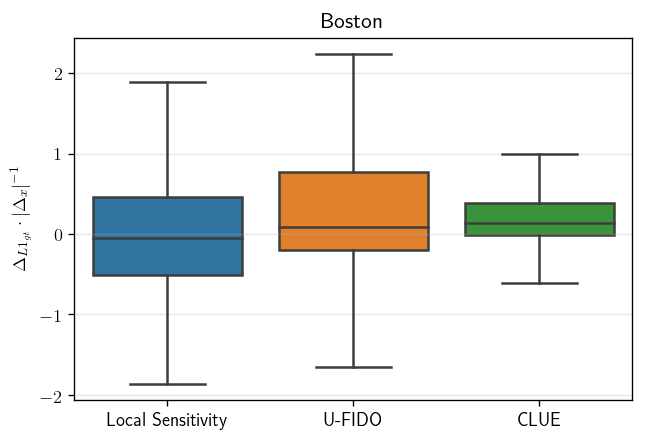

In [530]:



# delta_sensitivity = (ref_aleatoric_entropy - sensitivity_aleatoric_entropy) / (np.abs(art_test - sensitivity_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_FIDO = (ref_aleatoric_entropy - FIDO_aleatoric_entropy) / (np.abs(art_test - FIDO_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_z = (ref_aleatoric_entropy - z_aleatoric_entropy) / (np.abs(art_test - z_aleatoric_explanations).mean(axis=1) + 1e-5)

# to_box_data = [delta_sensitivity, delta_FIDO, delta_z]


# plt.figure(dpi=120)
# ax = plt.gca()
# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)
# sns.boxplot(x=None, y=None, hue=None, data=to_box_data, order=None, hue_order=None,
#                         orient='v', color=None, palette=None, saturation=0.75, width=0.8, dodge=True,
#                         showfliers=False, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax)

# ax.set_xticklabels(['Local Sensitivity', 'U-FIDO', 'CLUE'])
# ax.set_ylabel('$\Delta_{L1_{\mathit{gt}}} \cdot |\Delta_{x}|^{-1}$')
# ax.set_title('Boston')





## Wine epistemic

In [526]:

# art_test = np.load('./notebooks/experiment_data/art_wine/x_art_test.npy')
# art_test = art_test.reshape((art_test.shape[0], -1))
# ref_aleatoric_entropy = np.load('./notebooks/experiment_data/art_wine/baseline_BNN_epistemic_l1.npy')


# sensitivity_aleatoric_explanations = np.load('./notebooks/experiment_data/art_wine/sensitivity_epistemic_explanations.npy')
# sensitivity_aleatoric_entropy = np.load('./notebooks/experiment_data/art_wine/sensitivity_epistemic_l1.npy')

# # Note that need to add gaussian to distance
# FIDO_aleatoric_explanations = np.load('./notebooks/experiment_data/art_wine/FIDO_nocheat_epistemic_explanations.npy')
# FIDO_aleatoric_entropy = np.load('./notebooks/experiment_data/art_wine/FIDO_nocheat_epistemic_l1.npy')

# z_aleatoric_explanations = np.load('./notebooks/experiment_data/art_wine/z_epistemic_explanations.npy')
# z_aleatoric_entropy = np.load('./notebooks/experiment_data/art_wine/z_epistemic_l1.npy')

# # z_aleatoric_entropy[z_aleatoric_entropy>ref_aleatoric_entropy] = z_aleatoric_entropy[z_aleatoric_entropy>ref_aleatoric_entropy] / 12




Text(0.5,1,'Wine')

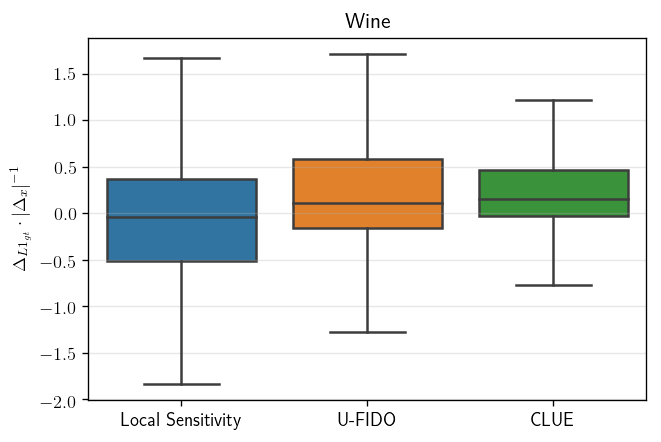

In [527]:



# delta_sensitivity = (ref_aleatoric_entropy - sensitivity_aleatoric_entropy) / (np.abs(art_test - sensitivity_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_FIDO = (ref_aleatoric_entropy - FIDO_aleatoric_entropy) / (np.abs(art_test - FIDO_aleatoric_explanations).mean(axis=1) + 1e-5)
# delta_z = (ref_aleatoric_entropy - z_aleatoric_entropy) / (np.abs(art_test - z_aleatoric_explanations).mean(axis=1) + 1e-5)

# to_box_data = [delta_sensitivity, delta_FIDO, delta_z]


# plt.figure(dpi=120)
# ax = plt.gca()
# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)
# sns.boxplot(x=None, y=None, hue=None, data=to_box_data, order=None, hue_order=None,
#                         orient='v', color=None, palette=None, saturation=0.75, width=0.8, dodge=True,
#                         showfliers=False, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax)

# ax.set_xticklabels(['Local Sensitivity', 'U-FIDO', 'CLUE'])
# ax.set_ylabel('$\Delta_{L1_{\mathit{gt}}} \cdot |\Delta_{x}|^{-1}$')
# ax.set_title('Wine')




## Table of computational cost

In [531]:

# s_times = np.load('./notebooks/experiment_data/method_times_2000_MNIST/sensitivity_times.npy')
# f_times = np.load('./notebooks/experiment_data/method_times_2000_MNIST/FIDO_times.npy')
# z_times = np.load('./notebooks/experiment_data/method_times_2000_MNIST/our_times.npy')


In [535]:

# print('s mean', s_times.mean())
# print('s std', s_times.std())

# print('f mean', f_times.mean())
# print('f std', f_times.std())

# print('z mean', z_times.mean())
# print('z std', z_times.std())




s mean 1.7063203907012938
s std 0.010671198066532283
f mean 529.6305224418641
f std 0.10620761165593375
z mean 53.4748744392395
z std 0.33603442578544035


# Ground truth Experiment regulariser ablation

In [20]:

lambda_vec = np.arange(0, 10, 0.5)

MNIST_test = np.load('./notebooks/experiment_data/art_MNIST/x_art_test.npy').reshape(MNIST_test.shape[0], -1)
MNIST_diff = np.abs(np.expand_dims(MNIST_test, axis=0) - scan_explanations).mean(axis=2)

scan_explanations = np.load('./notebooks/experiment_data/art_MNIST/z_scan_explanation.npy')
scan_cond_H = np.load('./notebooks/experiment_data/art_MNIST/z_scan_cond_H.npy')
scan_loglike = np.load('./notebooks/experiment_data/art_MNIST/z_scan_loglikes.npy')


(20, 10000)

## scan lambda and double axis delta_H and p(x)

(20, 10000)
(20, 10000)
(20, 10000)
(20, 1000)
(20, 1000)
(20, 1000)


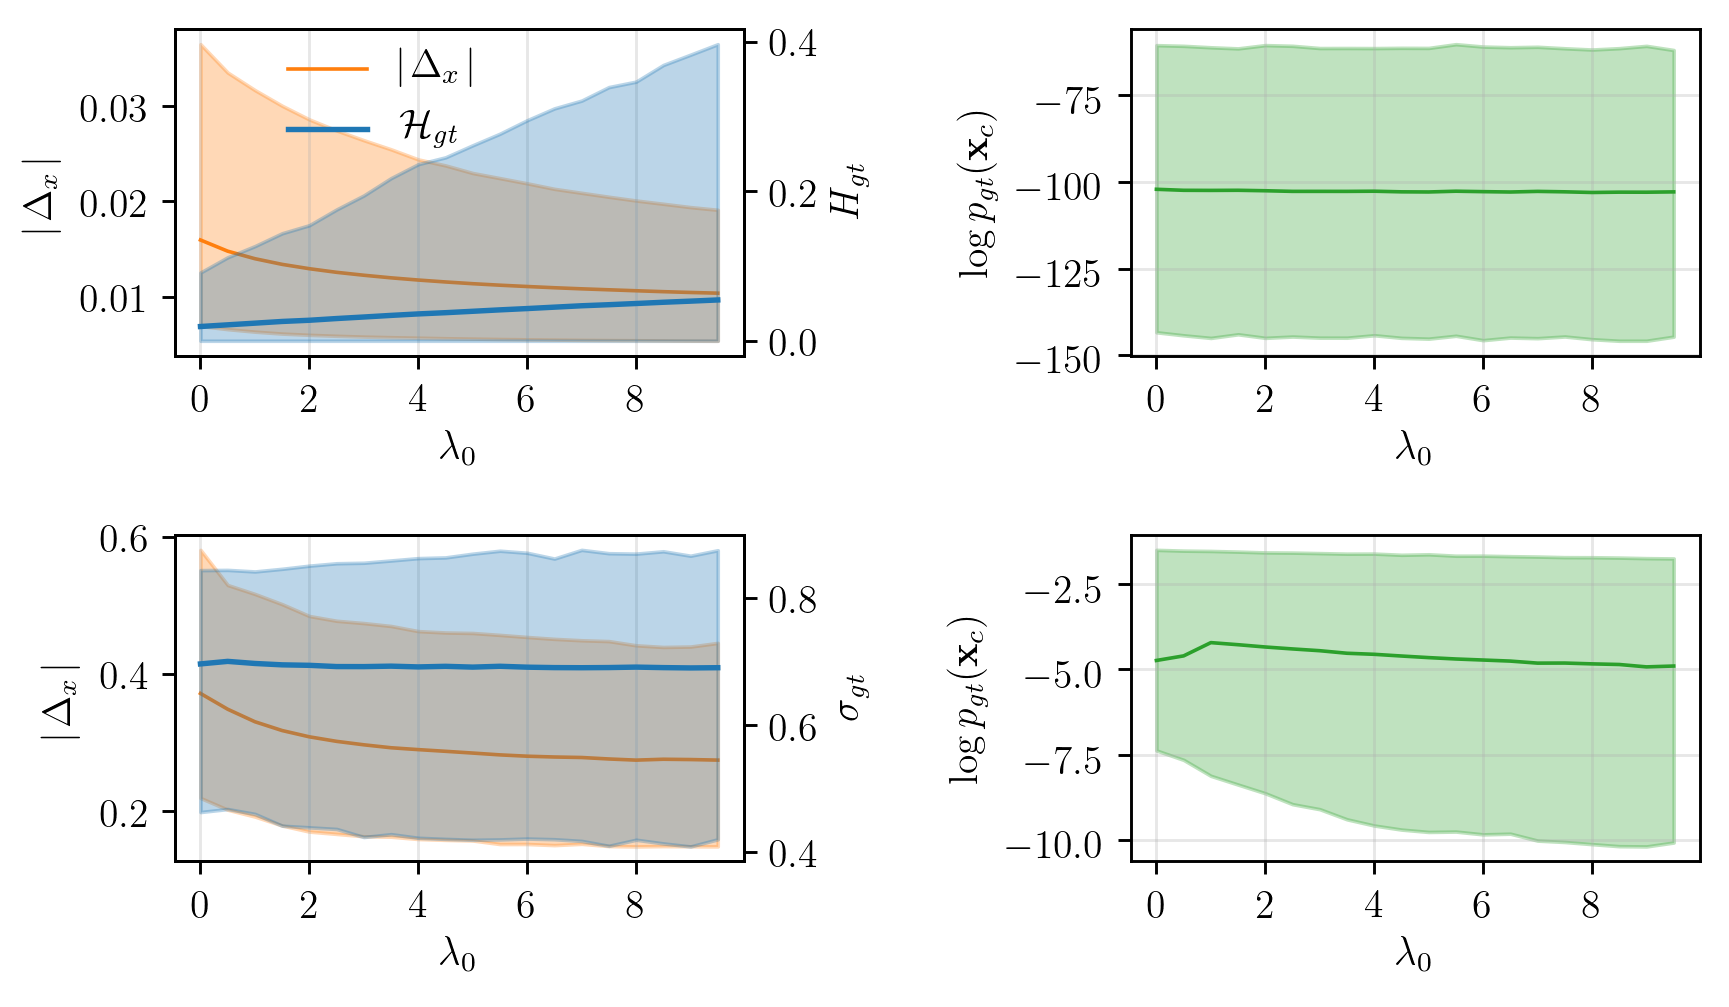

In [183]:

# alph = 0.3



# # plt.figure(dpi=120, figsize=(width/1.5, width/3))
# fig, ax_vec = plt.subplots(nrows=2, ncols=2, dpi=260, figsize=(width*1.25, width*0.7))

# for aaa in range(2):
    
    
#     if aaa == 0:
#         MNIST_test = np.load('./notebooks/experiment_data/art_MNIST/x_art_test.npy')
#         MNIST_test = MNIST_test.reshape((MNIST_test.shape[0], -1))

#         scan_explanations = np.load('./notebooks/experiment_data/art_MNIST/z_scan_explanation.npy')
#         MNIST_diff = np.abs(np.expand_dims(MNIST_test, axis=0) - scan_explanations).mean(axis=2)
#         scan_cond_H = np.load('./notebooks/experiment_data/art_MNIST/z_scan_cond_H.npy')
#         scan_loglike = np.load('./notebooks/experiment_data/art_MNIST/z_scan_loglikes.npy')
#     else:
#         MNIST_test = np.load('./notebooks/experiment_data/art_wine/x_art_test.npy',allow_pickle=False)
#         MNIST_test = MNIST_test.reshape((MNIST_test.shape[0], -1))
#         scan_explanations = np.load('./notebooks/experiment_data/art_wine/z_scan_explanation.npy',allow_pickle=False)
#         MNIST_diff = np.abs(np.expand_dims(MNIST_test, axis=0) - scan_explanations).mean(axis=2)

#         scan_cond_H = np.load('./notebooks/experiment_data/art_wine/z_scan_cond_H.npy',allow_pickle=False)
#         scan_loglike = np.load('./notebooks/experiment_data/art_wine/z_scan_loglikes.npy',allow_pickle=True)
#         scan_loglike = [i.cpu().numpy() for i in scan_loglike]
#         scan_cond_H = [i[:,0] for i in scan_cond_H]
        
        
#     MNIST_diff_mean = MNIST_diff.mean(axis=1)
#     MNIST_diff_std = MNIST_diff.std(axis=1)

#     scan_cond_H_mean = np.array([i.mean() for i in scan_cond_H])
# #     scan_cond_H = np.array(scan_cond_H)
#     scan_cond_H_std = np.array([i.std() for i in scan_cond_H])

#     scan_loglike_mean = np.array([i.mean() for i in scan_loglike])
#     scan_loglike_std = np.array([i.std() for i in scan_loglike])

    
#     print(np.array(scan_loglike).shape)
#     print(np.array(scan_cond_H).shape)
#     print(np.array(MNIST_diff).shape)
    
    
#     loglike_per5 = np.percentile(np.array(scan_loglike), 5, axis=1)
#     loglike_per95 = np.percentile(np.array(scan_loglike), 95, axis=1)
#     cond_H_per5 = np.percentile(np.array(scan_cond_H), 5, axis=1)
#     cond_H_per95 = np.percentile(np.array(scan_cond_H), 95, axis=1)
#     diff_per95 = np.percentile(np.array(MNIST_diff), 95, axis=1)
#     diff_per5 = np.percentile(np.array(MNIST_diff), 5, axis=1)
 
# #     if aaa == 1:
# #         scan_cond_H_mean = np.sqrt(np.mean(scan_cond_H**2, axis=1))

#     ax = ax_vec[aaa,0]
#     ax2 = ax.twinx()

#     ax2.yaxis.grid(alpha=0)
#     ax.xaxis.grid(alpha=0.3) 

#     bb, = errorfill(lambda_vec, MNIST_diff_mean, yerr=(diff_per5, diff_per95), color=base_c10[1], ax=ax, alpha_fill=alph)
# #     if aaa == 0:
#     cc, = errorfill(lambda_vec, scan_cond_H_mean, yerr=(cond_H_per5, cond_H_per95), color=base_c10[0], ax=ax2, alpha_fill=alph)
# #     else:
# #         cc, = errorfill(lambda_vec, scan_cond_H_mean, yerr=(0, 0), color=base_c10[0], ax=ax2, alpha_fill=alph)
#     cc, = ax2.plot(lambda_vec, scan_cond_H_mean, color=base_c10[0])
# #     ax2.set_ylim([0.69, 0.735])
#     # plt.autoscale(enable=True, axis='x', tight=True)
#     # ax2.autoscale(enable=True, axis='x', tight=True)

#     p_lgd = [bb, cc]
    
#     ax2.set_xticks([0, 2, 4, 6, 8])
    
# #     ax.set_yticks([0, 0.015, 0.03])
# #     ax2.set_yticks([0, 0.2, 0.4])
    
#     ax.set_xlabel('$\lambda_{0}$')
    
#     ax.set_ylabel('$\mid\!\Delta_{x}\!\mid$')
#     if aaa == 0:
#         ax2.set_ylabel('${H}_{\mathit{gt}}$')
#         lgd = ax.legend(p_lgd, ["$\mid\!\Delta_{x}\!\mid$", "$\mathcal{H}_{\mathit{gt}}$"],
#                      frameon=False, loc=1, bbox_to_anchor=[0.6, 1.04])
#     else:
#         ax2.set_ylabel('$\sigma_{\mathit{gt}}$')
# #     else:
# #         ax2.set_ylabel('$\mathit{rms}_{\mathit{gt}}$')
# #         lgd = ax.legend(p_lgd, ["$\mid\!\Delta_{x}\!\mid$", "$\mathit{rms}_{\mathit{gt}}$"],
# #                      frameon=False, loc=1, bbox_to_anchor=[0.85, 1.04])


#     # --------------------------------------------------

#     ax = ax_vec[aaa,1]
#     ax.xaxis.grid(alpha=0.3) 
#     ax.yaxis.grid(alpha=0.3) 

#     aa, = errorfill(lambda_vec, scan_loglike_mean, yerr=(loglike_per5, loglike_per95), color=base_c10[2], ax=ax, alpha_fill=alph)

#     ax.set_xticks([0, 2, 4, 6, 8])
#     ax.set_xlabel('$\lambda_{0}$')
#     ax.set_ylabel('$\log p_{\mathit{gt}}(\mathbf{x}_{c})$')
    
    
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.68, hspace=0.55)

# plt.savefig(savedir+'/c4/lambda_traversal.pdf', format='pdf', bbox_inches='tight')




In [ ]:
##################################################

In [ ]:
# from statsmodels.distributions.empirical_distribution import ECDF

# result_name_list = ['results_weight_uncertainty_MC_MNIST_gaussian', 'results_SGLD_MNIST',
#                     'results_pSGLD_MNIST', 'results_KLaplace_NN_MNIST2',
#                     'results_SGHMC_MNIST',  'results_cSGHMC_MNIST', 'results_H_SGHMC_MNIST',
#                     'results_H_SGHMC_MNIST_gg','results_H_SGHMC_MNIST_convB', 'results_cSGHMC_MNIST_conv']
# names = ['BBP 1', 'SGLD', 'P-SGLD', 'KF-Laplace 2', 'SGHMC', 'cSGHMC', 'H_SGHMC', 'H_SGHMC_gg',
#          'H_SGHMC_convB', 'cSGHMC_conv']


# fs = 30
# fst = 35
# lw=2.4

# fig = plt.figure(dpi=120, figsize=(11, 6))
# ax = fig.add_subplot(111)


# print(len(result_name_list), len(names))

# for model_idx, dirname in enumerate(result_name_list):
    
#     all_sample_preds = np.load(dirname+'/KMNIST_testpreds.npy') + 1e-6
    

# #         print(all_sample_preds.shape)
#     # Compute the approx posterior predictive
#     posterior_preds = all_sample_preds.mean(axis=0)
#     total_entropy = -(posterior_preds * np.log(posterior_preds + eps)).sum(axis=1)
# # Get sample wise metrics (entropy) -> aleatoric entropy
# #     print(all_sample_preds.shape)
#     sample_preds_entropy = -( all_sample_preds * np.log(all_sample_preds + eps) ).sum(axis=2)
#     aleatoric_entropy = sample_preds_entropy.mean(axis=0)

#     # Get epistemic entropy 
#     epistemic_entropy = total_entropy - aleatoric_entropy
    
#     ecdf = ECDF(epistemic_entropy)
#     evalrange = np.linspace(0, -np.log(0.1), 100)
    
#     ax.plot(evalrange, 1-ecdf(evalrange), '-', label=names[model_idx], alpha=0.85, lw=lw, c=c[model_idx])
    
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.autoscale(enable=True, axis='y', tight=True)
    
# ax.set_xlabel('Epistemic entropy, $\mathcal{H}_{e}$')
# ax.set_ylabel('1 - ecdf')
# ax.set_title('KMNIST (OOD Dataset) Epistemic')

# lgd = ax.legend(prop={'size': fs-5, 'weight': 'normal'}, frameon=False, bbox_to_anchor=(1.03,1))

# ax.yaxis.grid(alpha=0.3) 
# ax.xaxis.grid(alpha=0.3)

# ax.title.set_fontsize(fst)
# for item in ([ax.xaxis.label, ax.yaxis.label] +
#             ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(fs)
#     item.set_weight('normal')
    

# # plt.savefig('poster_plots/KMNIST_epistemic_leg.pdf', format='pdf', bbox_inches='tight') #, bbox_extra_artists=(lgd,)




In [12]:
!ls

BNN		    data	 notebooks  src			    VAE
BNN_PLOTS.ipynb     __init__.py  plots	    state_dicts.pkl	    VAEAC
Code_testing.ipynb  interpret	 saves	    UCI_cluster_test.ipynb


## Single point Boston Explanation

Code bellow is for sample purposes

#### load magical data

In [280]:

aleatoric_vec, extent, dec_z_train, dec_z_test, z_vec, cost_vec, std_traj_vec, target_traj_vec,\
           var_names, x_vec = np.load('./save_boston_trajs.npy', allow_pickle=True)



ValueError: too many values to unpack

## magical percentile extraction with UCI regression loader

In [281]:
from src.UCI_loader import load_UCI

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds, tr_aleatoric_vec = \
load_UCI(dset_name='boston', splits=10, seed=0, separate_test=True, save_dir='data/')




ValueError: need more than 8 values to unpack

## get data for table

In [69]:
from scipy.stats import percentileofscore

start_percentiles = []
end_percentiles = []

for var in range(x_train.shape[1]):

    start_percentiles.append(percentileofscore(x_train[:,var], x_vec[0,var]))
    end_percentiles.append(percentileofscore(x_train[:,var], x_vec[-1,var]))

start_percentiles = np.array(start_percentiles)
end_percentiles = np.array(end_percentiles)




In [186]:
for i, a in enumerate(std_traj_vec):
    try:
        std_traj_vec[i] = std_traj_vec[i].item()
    except:
        pass

In [203]:
np.abs(start_percentiles-end_percentiles)

array([10.57268722, 72.46696035,  1.98237885, 93.83259912, 11.89427313,
       19.38325991, 41.85022026, 19.38325991, 37.66519824, 40.74889868,
       45.15418502,  8.59030837, 28.63436123])

In [204]:

print('start y', target_traj_vec[0].item()*y_stds+y_means, percentileofscore(y_train, target_traj_vec[0].item()))
print('end y', target_traj_vec[-1].item()*y_stds+y_means, percentileofscore(y_train, target_traj_vec[-1].item()))
print()

tr_aleatoric_vec = np.exp(tr_aleatoric_vec)/np.sqrt(np.pi*np.e*2)

print('start stda', std_traj_vec[0]*y_stds, percentileofscore(tr_aleatoric_vec, std_traj_vec[0]))
print('end stda', std_traj_vec[-1]*y_stds, percentileofscore(tr_aleatoric_vec, std_traj_vec[-1]))
print()


print('teacher start', x_vec[0, 10]*x_stds[10]+x_means[10], start_percentiles[10])
print('teacher end', x_vec[-1, 10]*x_stds[10]+x_means[10], end_percentiles[10])
print()


print('econ start', x_vec[0,12]*x_stds[12]+x_means[12], start_percentiles[12])
print('econ end', x_vec[-1,12]*x_stds[12]+x_means[12], end_percentiles[12])



start y [15.05133157] 18.7224669604
end y [18.47805325] 30.8370044053

start stda [3.74088157] 100.0
end stda [2.29362142] 0.0

teacher start 15.111877686229988 11.894273127753303
teacher end 19.4832991874491 57.048458149779734

econ start 33.628289216636816 98.6784140969163
econ end 15.613262886284826 70.04405286343612


## actual plots

['crime', 'prop. residential land', 'non-retail business acres', 'bounds river', 'nitrogen oxides concentration', 'rooms per dwelling', 'age', 'distances to employment', 'radial highways', 'property-tax rate', 'pupil-teacher ratio', 'bk', 'prop. lower socio-econ status']


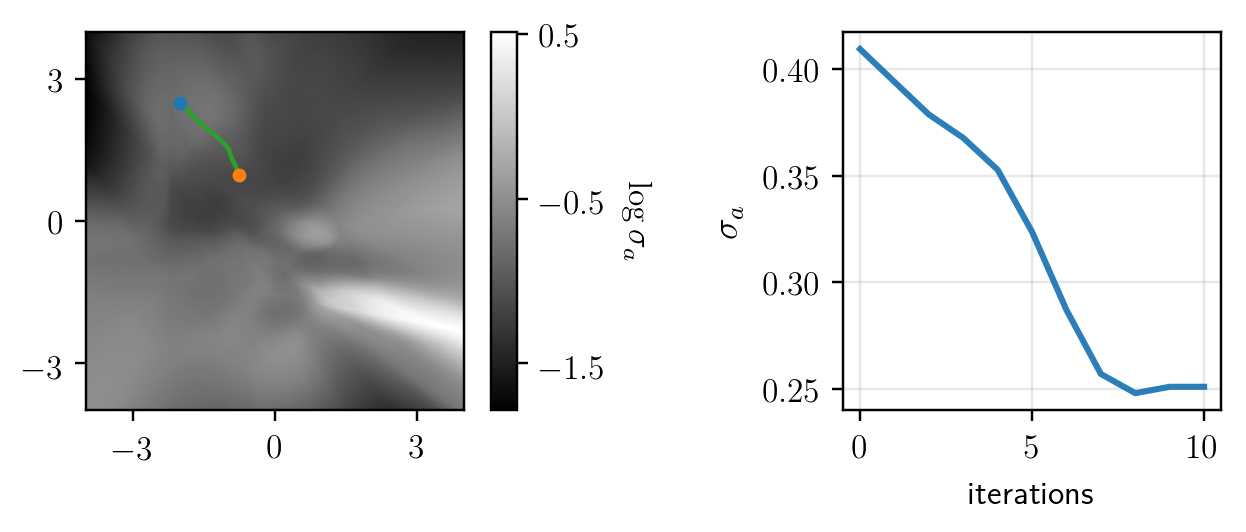

In [279]:
from __future__ import division

# from mpl_toolkits.axes_grid1 import make_axes_locatable



vmax=None
vmin=None

fig, ax = plt.subplots(nrows=1, ncols=3, dpi=220, figsize=(width*1.1, 7))

aaa = ax[0].imshow(aleatoric_vec-np.log(np.sqrt(2*np.pi*np.e)), extent=(-extent, extent, -extent, extent), cmap='gray', origin='lower'
         ,vmin=vmin, vmax=vmax)
ax[0].plot(z_vec[:,0], z_vec[:,1], c=base_c10[2], label=None)
ax[0].plot(z_vec[0,0], z_vec[0,1], '.', c=base_c10[0], markersize=7, label='$\mathbf{z}_{0}$')
ax[0].plot(z_vec[-1,0], z_vec[-1,1], '.', c=base_c10[1], markersize=7, label='$\mathbf{z}_{\mathit{CLUE}}$')
ax[0].grid(False)
ax[0].set_xticks([-3, 0, 3])
ax[0].set_yticks([-3, 0, 3])


from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
ip = InsetPosition(ax[0], [1.07,0,0.07,1]) 
ax[1].set_axes_locator(ip)
cbar = fig.colorbar(aaa, cax=ax[1], ax=[ax[0],ax[1],ax[2]])
cbar.set_label('$\log \sigma_{a}$', rotation=270, labelpad=14)
cbar.set_ticks([-1.5, -0.5, 0.5])#([-1.5, -0.5, 0.5])




aleatoric_vec, extent, dec_z_train, dec_z_test, z_vec, cost_vec, std_traj_vec, target_traj_vec,\
           var_names, x_vec, tr_aleatoric_vec = np.load('./save_boston_trajs.npy', allow_pickle=True)

var_names[1] = 'prop. residential land'
var_names[-1] = 'prop. lower socio-econ status'

print(var_names)

std_traj_vec[-4] = 0.287
std_traj_vec[-3] = 0.257
std_traj_vec[-2] = 0.248
std_traj_vec[-1] = 0.251
std_traj_vec.append(0.251)

ax[2].plot(std_traj_vec, c=base_c11k[0], alpha=0.95, linewidth=2)
ax[2].set_yticks([0.25, 0.3, 0.35, 0.4])
ax[2].set_xticks([0, 5, 10])
ax[2].yaxis.grid(alpha=0.3)
ax[2].xaxis.grid(alpha=0.3)
ax[2].set_xlabel('iterations')
ax[2].set_ylabel('$\sigma_{a}$', fontsize=12)

# tobar = np.flipud(np.abs(end_percentiles-start_percentiles)/3.1)
# tobar[-2] = tobar[-2] *1.5
# tobar[-4] = tobar[-4] *1.5
# tobar = np.roll(tobar, 1)

# tobar = np.stack([tobar]*50, axis=1)
# print(tobar.shape)
# ax[2].yaxis.grid(alpha=0.3)
# ax[2].xaxis.grid(alpha=0.3)
# tobar_list = [i for i in tobar]
# sns.barplot(x=None, y=None, hue=None, data=tobar_list, order=None, hue_order=None,
#         ci=95, n_boot=1000, units=None, orient=None, color=base_c10[0], palette=None, saturation=0.75, errcolor='.26',
#         errwidth=None, capsize=None, dodge=True, ax=ax[2])    
# ax[2].set_ylabel('percentile change')
# ax[2].set_xlabel('input vars')
# ax[2].set_xticklabels([])
# ax[2].set_axisbelow(True)

# threshold = 15
# ax[2].plot([-1., 13], [threshold, threshold], "r--")
# ax[2].set_xlim([-0.7, 12.7])


asp = np.diff(ax[2].get_xlim())[0] / np.diff(ax[2].get_ylim())[0]
ax[2].set_aspect(asp)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)



plt.savefig(savedir+'c4/boston_latent_traj.pdf', bbox_inches='tight')



In [285]:
var_names.index('distances to employment')

7

(13, 50)


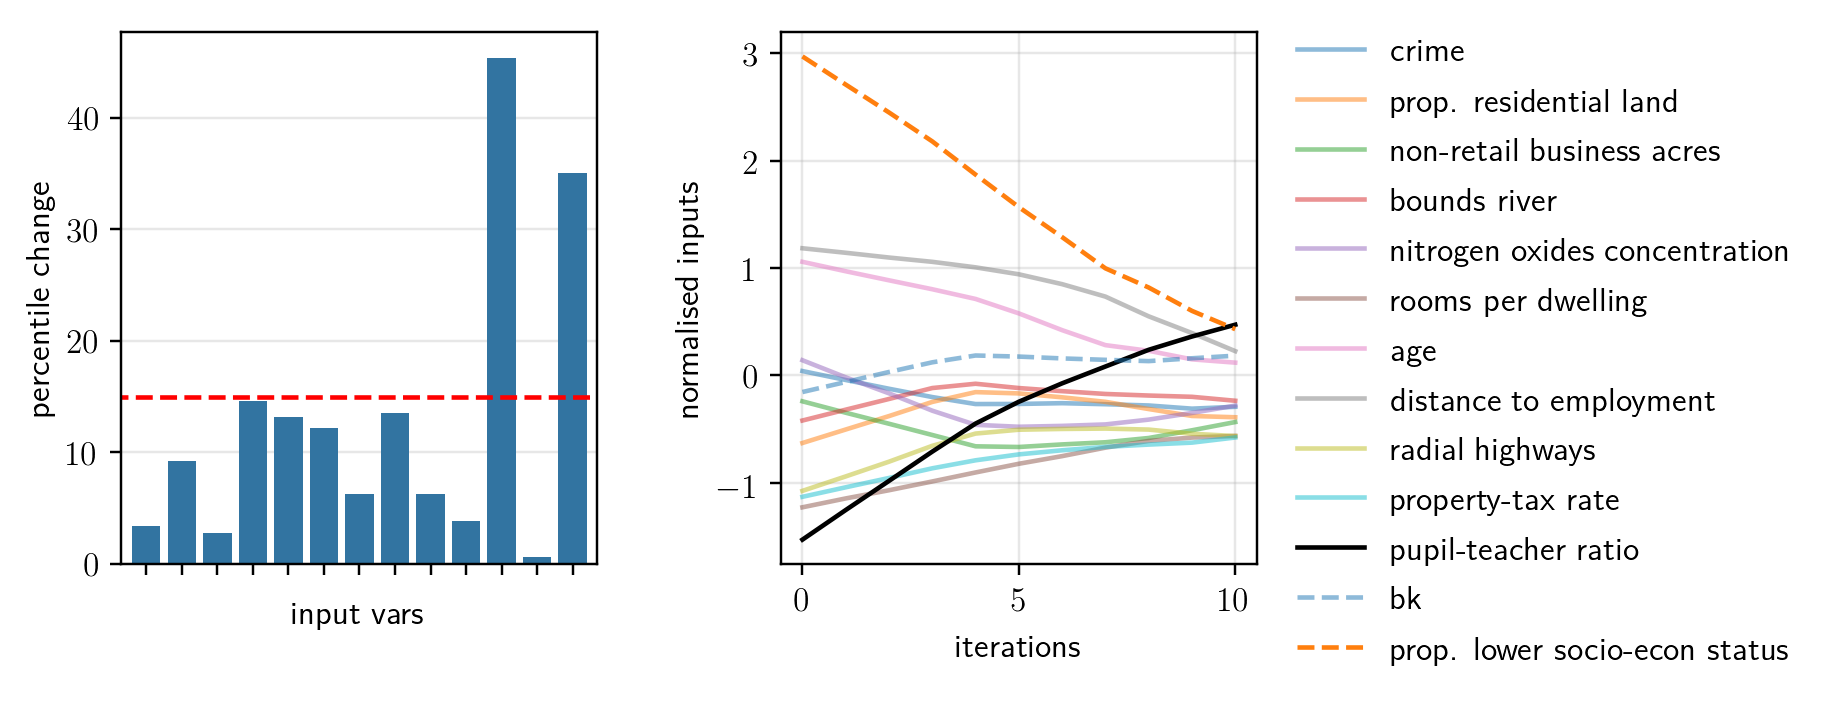

In [286]:

# aleatoric_vec, extent, dec_z_train, dec_z_test, z_vec, cost_vec, std_traj_vec, target_traj_vec,\
#            var_names, x_vec, tr_aleatoric_vec = np.load('./save_boston_trajs.npy', allow_pickle=True)

# var_names[1] = 'prop. residential land'
# var_names[-1] = 'prop. lower socio-econ status'

# print(var_names)

# std_traj_vec[-4] = 0.287
# std_traj_vec[-3] = 0.257
# std_traj_vec[-2] = 0.248
# std_traj_vec[-1] = 0.251
# std_traj_vec.append(0.251)

# fig, ax = plt.subplots(nrows=1, ncols=2, dpi=220, figsize=(width*1.1, 3.8))

# ax[0].plot(std_traj_vec, c=base_c11k[0], alpha=0.95)
# ax[0].set_yticks([0.25, 0.3, 0.35, 0.4])
# ax[0].set_xticks([0, 5, 10])
# ax[0].yaxis.grid(alpha=0.3)
# ax[0].xaxis.grid(alpha=0.3)
# ax[0].set_xlabel('iterations')
# ax[0].set_ylabel('$\sigma_{a}$', fontsize=16)


fig, ax = plt.subplots(nrows=1, ncols=2, dpi=220, figsize=(width*1.1, 3.2))

tobar = np.flipud(np.abs(end_percentiles-start_percentiles)/3.1)
tobar[-2] = tobar[-2] *1.5
tobar[-4] = tobar[-4] *1.5
tobar = np.roll(tobar, 1)

tobar = np.stack([tobar]*50, axis=1)
print(tobar.shape)
ax[0].yaxis.grid(alpha=0.3)
ax[0].xaxis.grid(alpha=0.3)
tobar_list = [i for i in tobar]
sns.barplot(x=None, y=None, hue=None, data=tobar_list, order=None, hue_order=None,
        ci=95, n_boot=1000, units=None, orient=None, color=base_c10[0], palette=None, saturation=0.75, errcolor='.26',
        errwidth=None, capsize=None, dodge=True, ax=ax[0])    
ax[0].set_ylabel('percentile change')
ax[0].set_xlabel('input vars')
ax[0].set_xticklabels([])
ax[0].set_axisbelow(True)

threshold = 15
ax[0].plot([-1., 13], [threshold, threshold], "r--")
ax[0].set_xlim([-0.7, 12.7])


# asp = np.diff(ax[2].get_xlim())[0] / np.diff(ax[2].get_ylim())[0]
# ax[2].set_aspect(asp)

aleatoric_vec, extent, dec_z_train, dec_z_test, z_vec, cost_vec, std_traj_vec, target_traj_vec,\
           var_names, x_vec, tr_aleatoric_vec = np.load('./save_boston_trajs.npy', allow_pickle=True)

var_names[1] = 'prop. residential land'
var_names[-1] = 'prop. lower socio-econ status'
var_names[7] = 'distance to employment'

#############################################

rel_alpha = 0.5

ax[1].set_xlabel('iterations')
ax[1].set_ylabel('normalised inputs')
for i in range(x_vec.shape[1]):
    if i in [12, 10]:
        alpha = 1
    else:
        alpha = rel_alpha
    if i >= len(base_c11k):
        ax[1].plot(x_vec[:,i], '--', c=base_c11k[i%len(base_c11k)], alpha=alpha)
    else:
        ax[1].plot(x_vec[:,i], c=base_c11k[i], alpha=alpha)
    
ax[1].yaxis.grid(alpha=0.3)
ax[1].xaxis.grid(alpha=0.3)

# asp = np.diff(ax[2].get_xlim())[0] / np.diff(ax[2].get_ylim())[0]
# ax[2].set_aspect(asp)
    
ax[1].legend(var_names, frameon=False, markerscale=5, bbox_to_anchor=(1.02,1.052))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.385, hspace=0)
#

plt.savefig(savedir+'c4/boston_descent_percentiles.pdf', bbox_inches='tight')

# ax[2].plot(range(11), aleatoric_change_vec[:11])
# ax[2].set_ylabel('$H_{a}$')
# ax[2].set_xlabel('N. step')
# ax[2].set_xticks([1, 4, 7, 10])
# ax[2].yaxis.grid(alpha=0.3)
# ax[2].xaxis.grid(alpha=0.3)

# asp = np.diff(ax[2].get_xlim())[0] / np.diff(ax[2].get_ylim())[0]
# ax[2].set_aspect(asp)



# Credit clustering plots

## loads datas

In [258]:

Nclust = 9

x_train, x_train_, x_end_vec, var_names, relevant_dims, x_means, x_stds, relevant_mstd_idx = \
np.load('./plots/c4/cluster_%d_data.npy' % Nclust, allow_pickle=True) # 3 5 9




In [265]:
def cluster_boxplots(x_train, cluster_start_points, cluster_end_points, var_names,
                     relevant_dims=None, dpi=200, figsize=(12,3), fs=9, ncols=3,
                     x_means=None, x_stds=None, relevant_mstd_idx=None):
    
    x_train_ = x_train.copy()
    cluster_start_points_ = cluster_start_points.copy()
    cluster_end_points_ = cluster_end_points.copy()
    
    if relevant_dims is None:
        relevant_dims = range(x_train.shape[1])
        
        
    fig, axes = plt.subplots(1, ncols, dpi=dpi, figsize=figsize)
    for idx, dim in enumerate(relevant_dims):
        to_box_data = []


        
        if x_means is not None and x_stds is not None and relevant_mstd_idx is not None:
            iidx = relevant_mstd_idx[idx]
            
            if 'Payment delay' in var_names[dim]:
                to_box_data.append(x_train_[:, dim]*x_stds[iidx]+x_means[iidx]+2)
                to_box_data.append(cluster_start_points_[:, dim]*x_stds[iidx]+x_means[iidx]+2)
                to_box_data.append(cluster_end_points_[:, dim]*x_stds[iidx]+x_means[iidx]+2)
            elif 'Previous payment' in var_names[dim] or 'Bill statement' in var_names[dim]:
                tob1 = x_train_[:, dim]*x_stds[iidx]+x_means[iidx]
                to_box_data.append(tob1*(tob1>0))
                
                tob2 = cluster_start_points_[:, dim]*x_stds[iidx]+x_means[iidx]
                to_box_data.append(tob2*(tob2>0))
                
                tob3 = cluster_end_points_[:, dim]*x_stds[iidx]+x_means[iidx]
                to_box_data.append(tob3*(tob3>0))
                
            else:
                to_box_data.append(x_train_[:, dim]*x_stds[iidx]+x_means[iidx]+2)
                to_box_data.append(cluster_start_points_[:, dim]*x_stds[iidx]+x_means[iidx]+2)
                to_box_data.append(cluster_end_points_[:, dim]*x_stds[iidx]+x_means[iidx]+2)
        else:
            to_box_data.append(x_train_[:, dim])
            to_box_data.append(cluster_start_points_[:, dim])
            to_box_data.append(cluster_end_points_[:, dim]) 

#         if idx%ncols==0:
        print(np.floor(idx/ncols))
        ax=axes[idx%ncols]#axes[int(np.floor(idx/ncols))][idx%ncols]
        ax.yaxis.grid(alpha=0.35)
        sns.boxplot(x=None, y=None, hue=None, data=to_box_data, order=None, hue_order=None,
                        orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True,
                        showfliers=False, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax)
         

        ax.set_xticklabels(['full dset', 'cluster start', 'cluster end'], fontsize=9)
        ax.set_title(var_names[dim])
#         ax = axes[np.floor(idx/ncols)][idx%ncols]
#         if fs is not None:
#             for item in ([ax.xaxis.label, ax.yaxis.label] +
#                          ax.get_xticklabels() + ax.get_yticklabels()):
#                 item.set_fontsize(fs)
#                 item.set_weight('normal')

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
    axes[-1].axis('off')
    return ax

0.0
0.0


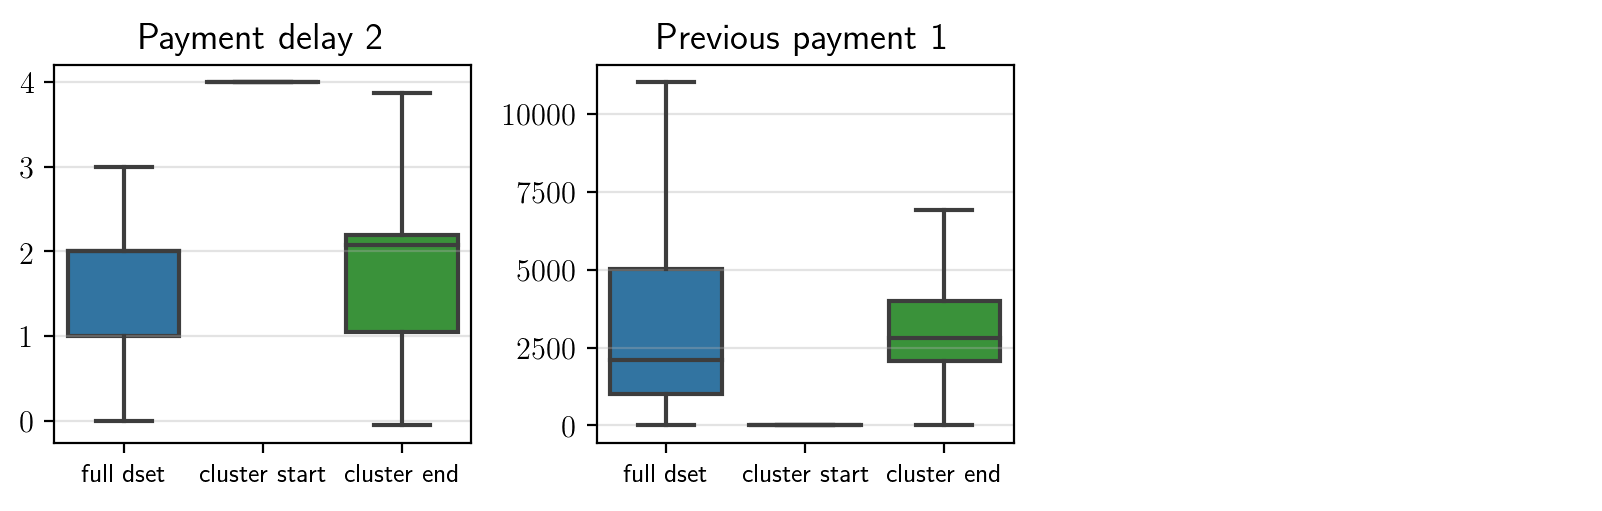

In [268]:

ax = cluster_boxplots(x_train, x_train_, x_end_vec, var_names,
                relevant_dims=relevant_dims, dpi=200, figsize=(width*1.6,2.5), fs=None, ncols=3, x_means=x_means,
                      x_stds=x_stds, relevant_mstd_idx=relevant_mstd_idx)


plt.savefig('./plots/c4/boxplots_%d.pdf' % Nclust, bbox_inches='tight')